In [1]:
import time
import random
from collections import deque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🧬 Resolución del problema de las N-reinas mediante Algoritmos Genéticos (AG)

Este proyecto aborda la resolución del clásico problema de las N-reinas utilizando Algoritmos Genéticos (AG), una técnica inspirada en los procesos evolutivos de la naturaleza.

El objetivo del problema es colocar N reinas en un tablero de ajedrez de NxN de forma que ninguna pueda atacar a otra, es decir, que no compartan fila, columna ni diagonal. Aunque la solución puede encontrarse mediante enfoques clásicos como el backtracking, aquí se propone una alternativa basada en inteligencia artificial evolutiva, capaz de buscar soluciones eficientes incluso para valores grandes de N.

## 1. Parámetros iniciales:

### 1.1. Representación del individuo

En este proyecto, cada individuo de la población será representado mediante una **permutación de N números**, donde cada número indica la **fila** en la que se ubica una reina, y su posición en el vector representa la **columna** correspondiente. Cada una de estas permutaciones será una lista de números enteros.

Por ejemplo, el cromosoma:

(1 3 2 4)


se interpreta como:
- La reina de la **fila 1** está en la **columna 1**,
- La reina de la **fila 2** está en la **columna 3**,
- La reina de la **fila 3** está en la **columna 2**,
- La reina de la **fila 4** está en la **columna 4**.

Esta representación garantiza automáticamente que **no haya conflictos en columnas ni filas**, ya que cada número (fila) y cada posición (columna) del vector son únicos.  
Por lo tanto, la evaluación se centra exclusivamente en detectar **conflictos en diagonales**, lo que simplifica la función de aptitud.

### 1.2. Evaluación (función de aptitud / fitness)

En el problema de las N-reinas, el objetivo es colocar \( N \) reinas en un tablero de \( N x N \) de forma que ninguna de las reinas se ataque. Las reinas se atacan si están en la misma fila, columna o diagonal. La función de fitness que se presenta evalúa cuántas parejas de reinas no se atacan entre sí diagonalmente. Cuanto mayor sea el valor de fitness, mejor es la disposición de las reinas en el tablero.

La fórmula matemática para la función de fitness es la siguiente:

$$
\text{fitness}(\text{población}) = \sum_{i=1}^{n} \sum_{j=i+1}^{n} \left[ \left| \text{individuo}[i] - \text{individuo}[j] \right| == \left| i - j \right| \right]
$$

Primero programaremos una función que dado un cromosoma como lista de enteros, devolverá su fitness:

In [2]:
def fitness(cromosoma):
    fitness = 0
    for i in range(len(cromosoma)):
        for j in range(i + 1, len(cromosoma)):
            fitness += (np.abs(cromosoma[i] - cromosoma[j]) == np.abs(i - j))
                    
    return fitness

Para facilitar la implementación del algoritmo, se definirá una clase que represente a cada individuo. Esta clase almacenará tanto los datos esenciales del cromosoma como su valor de fitness, además de la función utilizada para evaluarlo. De este modo, se centraliza la información relevante y se simplifica la gestión de los individuos a lo largo del proceso evolutivo.

In [3]:
class Individuo:
    def __init__(self, N_cromosoma, f_fitness, cromosoma=None):
        self.N_cromosoma = N_cromosoma

        # Almacenamos el cromosoma
        if cromosoma is None:
            # Genera un cromosoma aleatorio
            self.cromosoma = random.sample(range(N_cromosoma), N_cromosoma)
        else:
            self.cromosoma = cromosoma

        # Almacenamos la función de fitness
        self.f_fitness = f_fitness
        # Calcula el fitness del individuo
        self.fitness = f_fitness(self.cromosoma)

    def mostrar_individuo(self):
        print("Cromosoma:", self.cromosoma)
        print("Fitness:", self.fitness)

Probamos la clase creada:

In [4]:
individuo = Individuo(N_cromosoma=4, f_fitness=fitness)
individuo.mostrar_individuo()

Cromosoma: [0, 3, 2, 1]
Fitness: 4


### 1.3. Representación y gestión de la población

En un algoritmo genético, la población representa el conjunto de soluciones candidatas al problema que se quiere resolver. Cada individuo en la población es una posible solución, y su calidad se evalúa mediante una función de fitness. A lo largo de las generaciones, los individuos pueden cruzarse, mutar o ser reemplazados según su desempeño.

Para organizar y facilitar estas operaciones, se ha definido una clase `Poblacion`, encargada de representar y gestionar el estado de la población en cada iteración del algoritmo. Esta clase centraliza la lógica relacionada con la creación, evaluación y mantenimiento de los individuos, permitiendo que el resto del algoritmo sea más modular y legible.

#### Funcionalidades principales de la clase `Poblacion`:

1. **Generación de la población inicial**: Si no se proporciona una lista de individuos, la clase crea una población aleatoria inicial. Cada individuo se genera de forma válida según las reglas del problema de las N-reinas, representando una permutación de posiciones para las reinas.

2. **Evaluación del fitness**: Una vez generada la población, se evalúa automáticamente el fitness de cada individuo utilizando una función pasada como parámetro. Esto permite cuantificar la calidad de cada solución y calcular estadísticas como el fitness medio.

3. **Gestión de la población**: La clase permite acceder a los individuos, visualizar su información y mantener actualizados los datos agregados de la población, como los valores de fitness. Esto sienta las bases para aplicar posteriormente las operaciones de selección, cruce y mutación de manera estructurada.

#### Objetivos de diseño:

- Representar eficientemente una población de individuos en el contexto del algoritmo genético.
- Automatizar la evaluación del fitness al crear o modificar la población.
- Proveer una interfaz clara para mostrar y manipular los datos de la población.

Gracias a esta clase, se mejora la legibilidad y el mantenimiento del código, encapsulando detalles de bajo nivel y permitiendo centrarse en el diseño de estrategias evolutivas más efectivas.


In [5]:
class Poblacion:
    def __init__(self, N_poblacion, N_cromosoma, f_fitness, individuos=None):
        self.N_poblacion = N_poblacion
        self.N_cromosoma = N_cromosoma

        # Inicializamos los individuos
        if individuos is None:
            self.individuos = [Individuo(N_cromosoma=N_cromosoma, f_fitness=f_fitness) 
                               for _ in range(N_poblacion)]
        else:
            self.individuos = individuos

        # Calculamos los fitness de la población
        self.fitness_poblacion = [individuo.fitness for individuo in self.individuos]
        self.fitness_medio = np.mean(self.fitness_poblacion)

    def mostrar_poblacion(self):
        for idx, individuo in enumerate(self.individuos):
            print(f"Individuo {idx}:")
            individuo.mostrar_individuo()
            print()

In [6]:
poblacion = Poblacion(N_poblacion=5, N_cromosoma=4, f_fitness=fitness)
poblacion.mostrar_poblacion()

Individuo 0:
Cromosoma: [3, 2, 1, 0]
Fitness: 6

Individuo 1:
Cromosoma: [2, 0, 3, 1]
Fitness: 0

Individuo 2:
Cromosoma: [3, 2, 1, 0]
Fitness: 6

Individuo 3:
Cromosoma: [1, 3, 0, 2]
Fitness: 0

Individuo 4:
Cromosoma: [1, 3, 0, 2]
Fitness: 0



### 1.4. Selección de progenitores:

En los algoritmos genéticos, la selección de progenitores es un paso clave para generar nuevas soluciones a partir de la población actual. Se busca elegir a los individuos más aptos para reproducirse y generar descendencia, de manera que las mejores soluciones tengan una mayor probabilidad de ser seleccionadas.

En este caso, se utilizará el **método de la ruleta**, también conocido como **selección proporcional al ajuste** o **selección basada en fitness**. Este método simula una ruleta en la que cada individuo tiene un espacio proporcional a su valor de fitness. Cuanto menor sea el fitness de un individuo, mayor será su probabilidad de ser seleccionado como progenitor.

El proceso funciona de la siguiente manera:
1. **Calcular el fitness invertido de los individuos**: max_fitness(poblacion) - fitness(individuo).
2. **Asignar una probabilidad de selección**: Cada individuo tiene una probabilidad de ser seleccionado que es proporcional a su fitness invertido. Es decir, los individuos con un fitness menor tienen más probabilidades de ser elegidos.
3. **Seleccionar progenitores**: Se realiza una selección aleatoria, donde la probabilidad de selección de cada individuo es proporcional a su fitness invertido. Este proceso se repite hasta que se elijan los progenitores necesarios para la reproducción. Se hace una selección sin reemplazamiento.

In [80]:
def seleccionar_progenitores_ruleta(poblacion, N_progenitores):
    # Calculamos las probabilidades basadas en el fitness invertido (fitness bajo = mejor)
    fitness_invertido = 1 / (1 + np.array(poblacion.fitness_poblacion))
    # Seleccionamos los progenitores sin reemplazo
    progenitores_indices = np.random.choice(len(poblacion.individuos), size=N_progenitores, replace=False, p=fitness_invertido / np.sum(fitness_invertido))
    progenitores = [poblacion.individuos[i] for i in progenitores_indices]

    return progenitores

Probamos la función creada:

In [33]:
progenitores = seleccionar_progenitores_ruleta(poblacion, 2)
for idx, progenitor in enumerate(progenitores):
    print(f"Progenitor {idx}:")
    progenitor.mostrar_individuo()
    print()

Progenitor 0:
Cromosoma: [1, 3, 0, 2]
Fitness: 0

Progenitor 1:
Cromosoma: [2, 0, 3, 1]
Fitness: 0



### 1.5. Cruzamiento de los progenitores:

Una vez seleccionados los progenitores, se realiza el cruzamiento con el objetivo de combinar la información genética de dos individuos y generar nuevos cromosomas (descendientes) que hereden características de ambos padres.
Para este problema, donde los cromosomas representan permutaciones válidas (como en el caso del problema de las N-reinas), utilizamos el Cruzamiento Parcialmente Mapeado (PMX). Este método asegura que los hijos generados también sean permutaciones válidas, evitando duplicados y manteniendo la diversidad genética.
El PMX conserva bloques de genes del primer progenitor y completa el resto del cromosoma respetando el orden y la posición relativa de los genes del segundo progenitor, mediante un sistema de correspondencias.

Crearemos una función que realice el cruzamiento parcialmente mapeado:

In [45]:
def cruzar_progenitores_pmx(progenitor1, progenitor2):
    p1 = np.array(progenitor1.cromosoma)
    p2 = np.array(progenitor2.cromosoma)
    N = len(p1)

    # Seleccionamos dos puntos de corte aleatorios
    punto1, punto2 = sorted(random.sample(range(N), 2))

    offspring = np.empty(N, dtype=p1.dtype)
    offspring[punto1:punto2] = p1[punto1:punto2]

    # Copiamos el resto desde p2, resolviendo conflictos por mapeo
    for i in np.concatenate((np.arange(0, punto1), np.arange(punto2, N))):
        candidate = p2[i]
        while candidate in p1[punto1:punto2]:
            candidate = p2[np.where(p1 == candidate)[0][0]]
        offspring[i] = candidate

    return Individuo(N_cromosoma=N,
                     f_fitness=progenitor1.f_fitness,
                     cromosoma=offspring.tolist())

Probamos la función creada:

In [46]:
hijo = cruzar_progenitores_pmx(progenitor1=progenitores[0], 
                           progenitor2=progenitores[1])
hijo.mostrar_individuo()

Cromosoma: [2, 3, 0, 1]
Fitness: 4


### 1.6. Mutación de los descendientes:

Después del cruzamiento, se aplica una operación de mutación con el objetivo de introducir variación genética y evitar que la población se estanque en soluciones subóptimas.

En este caso, utilizaremos la **Mutación por sacudida**, una técnica adecuada para problemas de permutación como las N-reinas.

Esta mutación consiste en seleccionar dos posiciones aleatorias dentro del cromosoma y reordenar aleatoriamente (hacer un *shuffle*) todos los genes comprendidos entre esas dos posiciones.  
Este enfoque permite una modificación más significativa del cromosoma, explorando nuevas configuraciones sin violar la restricción de que todos los genes deben ser únicos.

Esta estrategia es efectiva para mantener la diversidad y fomentar la exploración del espacio de soluciones.

Creamos una función que mute a los individuos por sacudida:

In [47]:
def mutar_individuo_sacudida(individuo):
    cromosoma = individuo.cromosoma
    mutado = cromosoma.copy()
    N_cromosoma = len(cromosoma)

    # Seleccionar dos índices aleatorios distintos
    i, j = sorted(random.sample(range(N_cromosoma), 2))

    # Mezclar aleatoriamente los elementos entre i y j (inclusive)
    segmento = mutado[i:j+1]
    random.shuffle(segmento)
    mutado[i:j+1] = segmento

    return Individuo(N_cromosoma=N_cromosoma, 
                     f_fitness=individuo.f_fitness, 
                     cromosoma=mutado)

Probamos la función creada:

In [56]:
mutado = mutar_individuo_sacudida(individuo)
print("Individuo sin mutar: ")
individuo.mostrar_individuo()
print()
print("Individuo mutado: ")
mutado.mostrar_individuo()

Individuo sin mutar: 
Cromosoma: [0, 3, 2, 1]
Fitness: 4

Individuo mutado: 
Cromosoma: [0, 3, 2, 1]
Fitness: 4


### 1.7. Selección de Supervivientes:

Una vez que se han generado los descendientes a través del cruzamiento y la mutación, se procede a la **selección de supervivientes** para conformar la siguiente generación.

En esta etapa, se combinan los individuos de la generación actual con los nuevos descendientes, y se seleccionan **N individuos** en función de su valor de fitness.

En este caso, seleccionaremos los supervivientes mediante el método de la ruleta. Para ello, crearemos una función que haga esta selección:

In [57]:
def seleccionar_supervivientes_ruleta(poblacion, descendientes):
    # Agregamos los descendientes a la población actual
    individuos = poblacion.individuos + descendientes
    f_fitness = individuos[0].f_fitness
    
    # Obtenemos los fitness de todos los individuos
    fitness_poblacion = np.array([individuo.fitness for individuo in individuos])
    
    # Calculamos las probabilidades basadas en el fitness invertido (fitness bajo = mejor)
    fitness_invertido = 1 / (1 + fitness_poblacion)  # Sumamos 1 para evitar división por 0
    
    # Normalizamos las probabilidades
    probabilidades = fitness_invertido / np.sum(fitness_invertido)
    
    # Seleccionamos los supervivientes (mismo tamaño que la población original)
    supervivientes_indices = np.random.choice(len(individuos), size=poblacion.N_poblacion, replace=False, p=probabilidades)
    
    supervivientes = [individuos[i] for i in supervivientes_indices]
    
    # Creamos una nueva población con los mejores individuos seleccionados
    poblacion_superviviente = Poblacion(
        N_poblacion=poblacion.N_poblacion,
        N_cromosoma=poblacion.N_cromosoma,
        f_fitness=f_fitness,
        individuos=supervivientes
    )
    
    return poblacion_superviviente

Probamos la función creada:

In [58]:
# Inicializamos la población con 5 individuos, cada uno con un cromosoma de longitud 4.
poblacion = Poblacion(N_poblacion=5, 
                      N_cromosoma=4, 
                      f_fitness=fitness)

# Seleccionamos 2 progenitores basados en su fitness.
progenitores = seleccionar_progenitores_ruleta(poblacion=poblacion, N_progenitores=2)

# Cruzamos los progenitores para crear los hijos.
hijo1 = cruzar_progenitores_pmx(progenitor1=progenitores[0],
                             progenitor2=progenitores[1])
hijo2 = cruzar_progenitores_pmx(progenitor1=progenitores[1],
                             progenitor2=progenitores[0])

# Mutamos el primer hijo intercambiando aleatoriamente dos posiciones en su cromosoma.
mutado = mutar_individuo_sacudida(individuo=hijo1)

# Seleccionamos los mejores individuos para la siguiente generación.
poblacion_superviviente = seleccionar_supervivientes_ruleta(poblacion, [mutado, hijo1, hijo2])

# Mostramos la nueva población de supervivientes.
poblacion_superviviente.mostrar_poblacion()

Individuo 0:
Cromosoma: [3, 1, 0, 2]
Fitness: 1

Individuo 1:
Cromosoma: [3, 2, 1, 0]
Fitness: 6

Individuo 2:
Cromosoma: [0, 2, 1, 3]
Fitness: 2

Individuo 3:
Cromosoma: [3, 2, 1, 0]
Fitness: 6

Individuo 4:
Cromosoma: [3, 2, 1, 0]
Fitness: 6



### 1.8. Implementación del algoritmo genético:

Por último, implementaremos el algoritmo genético. A continuación se describen los parámetros de entrada:

- `N_poblacion`:  
  Número total de individuos que componen la población en cada generación.

- `N_cromosoma`:  
  Tamaño del cromosoma de cada individuo. En el contexto del problema de las N-reinas, representa el número de reinas y el tamaño del tablero (por ejemplo, 8 para un tablero de 8x8).

- `f_fitness`:  
  Función que evalúa la calidad (fitness) de un individuo. Cuanto menor sea el valor de fitness, mejor es la solución.

- `f_sel_progenitores`:  
  Función que selecciona a los progenitores a partir de la población actual. Recibe la población y el número de progenitores a seleccionar.

- `f_sel_supervivientes`:  
  Función que decide qué individuos formarán la siguiente generación, combinando la población actual con los descendientes generados.

- `f_cruzamiento`:  
  Función que implementa el operador de cruzamiento (recombinación) entre dos progenitores para generar nuevos individuos (hijos).

- `f_mutacion`:  
  Función que aplica una mutación a un individuo, modificando su cromosoma de manera aleatoria para favorecer la exploración del espacio de búsqueda.

- `prob_cruz`:  
  Probabilidad de que dos progenitores seleccionados se crucen para generar descendientes. Si no se cumple esta probabilidad, no se produce cruzamiento.

- `prob_mut`:  
  Probabilidad de aplicar la mutación a cada descendiente generado tras el cruzamiento.

- `max_sin_mejoras`:  
  Número máximo de generaciones consecutivas sin mejora en el mejor fitness antes de detener el algoritmo.

La función devuelve una tupla con los siguientes valores:

1. `mejor_solucion`: El individuo con mejor fitness encontrado.
2. `mejor_fitness`: Valor de fitness del mejor individuo.
3. `mejor_fitness_generacion`: Lista con el mejor fitness de cada generación.
4. `fitness_medio_generacion`: Lista con el fitness medio de la población en cada generación.


In [62]:
def AG(N_poblacion, N_cromosoma, f_fitness, f_sel_progenitores, f_sel_supervivientes, f_cruzamiento, f_mutacion, prob_cruz, prob_mut, max_sin_mejoras):
    # Creamos una población aleatoria
    poblacion = Poblacion(N_poblacion=N_poblacion,
                          N_cromosoma=N_cromosoma,
                          f_fitness=f_fitness)

    # Listas para almacenar el progreso del algoritmo
    mejor_fitness_generacion = []
    fitness_medio_generacion = []

    iteraciones = 0
    while(True):
        # Guardamos el estado de la iteración
        mejor_fitness_generacion.append(np.min(poblacion.fitness_poblacion))
        fitness_medio_generacion.append(poblacion.fitness_medio)

        # Si hemos alcanzado una solución, finalizamos
        if np.min(poblacion.fitness_poblacion) == 0:
            break

        # Si llevamos max_sin_mejoras generaciones sin mejoras, finalizamos
        if iteraciones >= max_sin_mejoras:
            if all(x == mejor_fitness_generacion[iteraciones] for x in mejor_fitness_generacion[iteraciones-max_sin_mejoras : iteraciones+max_sin_mejoras]):
                break

        descendientes = []

        # Seleccionamos los progenitores
        progenitores = f_sel_progenitores(poblacion=poblacion, N_progenitores=2)
        progenitor1, progenitor2 = progenitores[0], progenitores[1]

        if np.random.rand() <= prob_cruz:
            # Generamos el primer hijo
            hijo1 = f_cruzamiento(progenitor1=progenitor1, 
                                       progenitor2=progenitor2)
            
            # Mutamos el primer hijo
            if np.random.rand() <= prob_mut:
                hijo1 = f_mutacion(hijo1)
            descendientes.append(hijo1)

            # Generamos el segundo hijo
            hijo2 = f_cruzamiento(progenitor1=progenitor2, 
                                       progenitor2=progenitor1)

            # Mutamos el segundo hijo
            if np.random.rand() <= prob_mut:
                hijo2 = f_mutacion(hijo2)
            descendientes.append(hijo2)

        # Seleccionamos los supervivientes
        poblacion = f_sel_supervivientes(poblacion=poblacion, descendientes=descendientes)

        iteraciones += 1

    # Obtenemos los resultados
    fitness_poblacion = poblacion.fitness_poblacion
    best_idx = np.argmin(fitness_poblacion)
    mejor_solucion = poblacion.individuos[best_idx]
    mejor_fitness = fitness_poblacion[best_idx]

    return mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion

Para facilitar la visualización del comportamiento del algoritmo genético a lo largo de las generaciones, definiremos una función encargada de generar gráficos con la evolución del fitness. Esta función utiliza `Matplotlib` para representar tanto el mejor fitness como el fitness medio en cada generación, y devuelve un objeto `Axes` que puede integrarse fácilmente en una figura existente o generar una nueva si no se proporciona uno.

De esta manera, podemos comparar distintas ejecuciones del algoritmo o visualizar múltiples estrategias dentro de una misma figura.


In [66]:
def crear_grafico_fitness(mejor_fitness, fitness_medio, titulo, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    # Si solo hay un valor, duplicarlo para dibujar una línea continua
    if len(mejor_fitness) == 1:
        mejor_fitness = mejor_fitness * 2
        fitness_medio = fitness_medio * 2
        x_values = [0, 1]
    else:
        x_values = list(range(len(mejor_fitness)))

    ax.plot(x_values, mejor_fitness, label="Mejor Fitness", color="green")
    ax.plot(x_values, fitness_medio, label="Fitness Medio", color="blue")
    ax.set_xlabel("Generaciones")
    ax.set_ylabel("Fitness")
    ax.set_title(titulo)
    ax.legend()
    ax.grid(True)

    return ax


A continuación, ejecutaremos el algoritmo genético para distintas instancias del problema de las N-reinas, considerando valores de N desde 6 hasta 20. El objetivo es analizar el comportamiento del algoritmo en función del tamaño del problema y visualizar los resultados obtenidos.

Tomaremos los siguientes parámetros:

- Probabilidad de cruzamiento: 90%
- Probabilidad de mutación: 30%
- Número máximo de iteraciones sin mejoras: 200

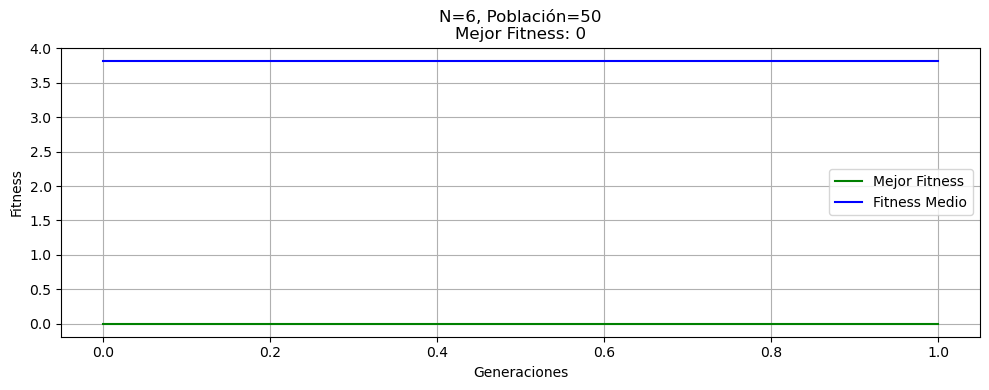

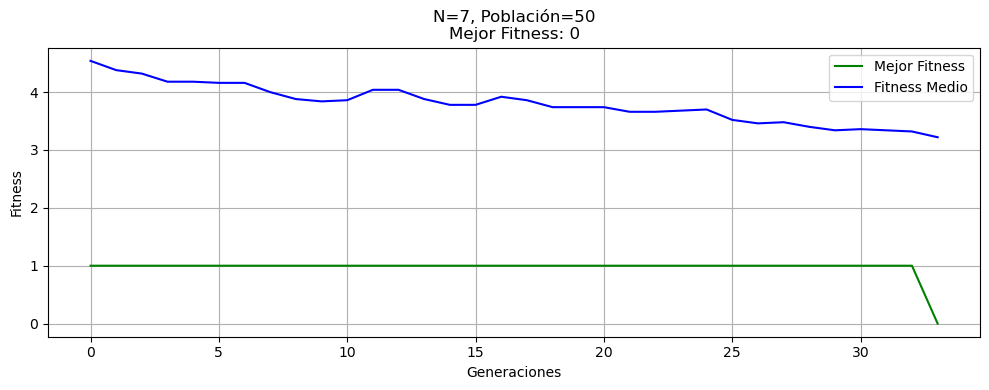

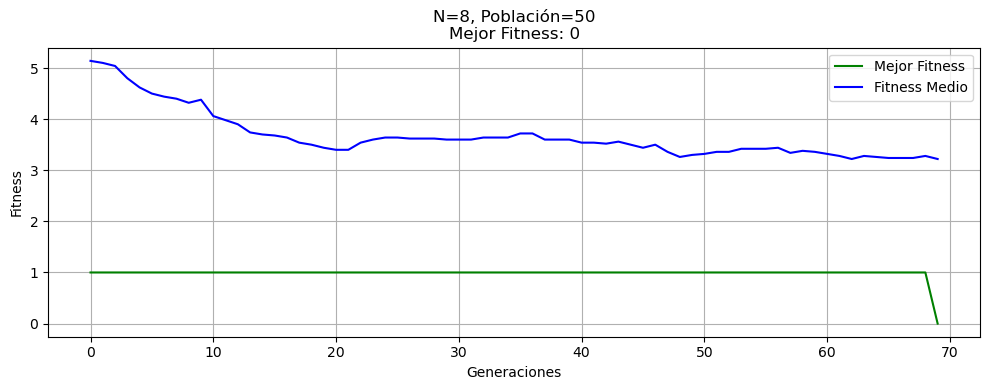

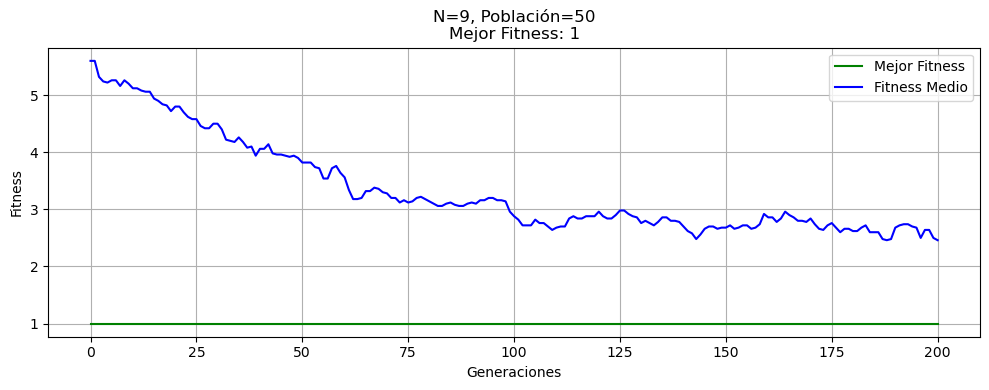

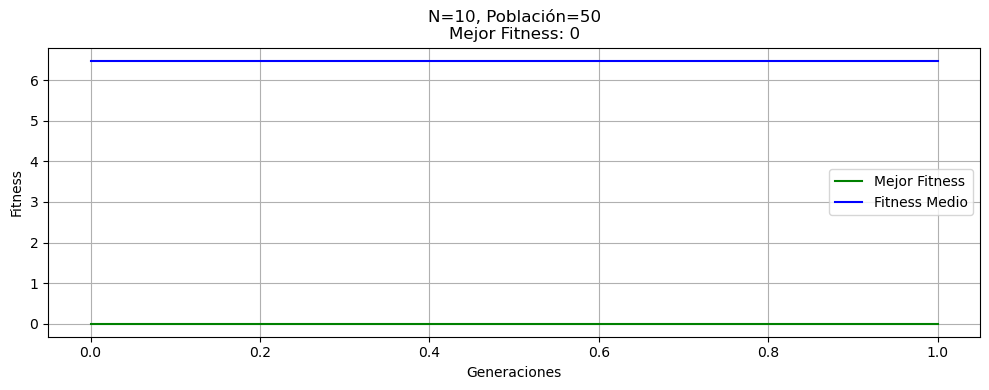

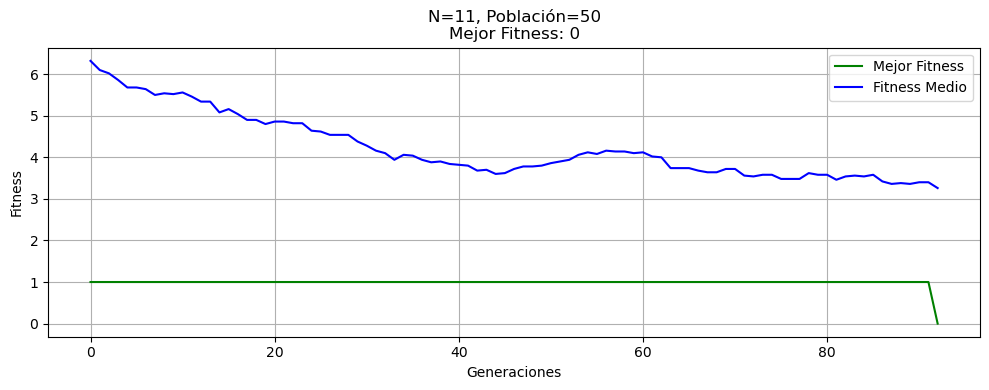

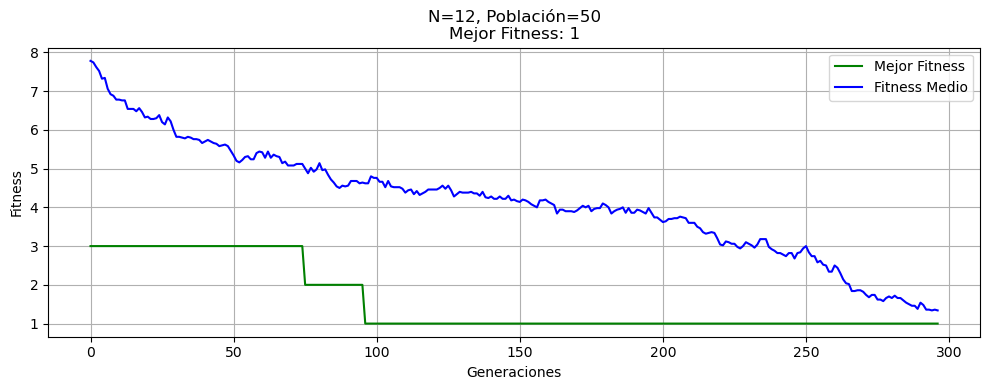

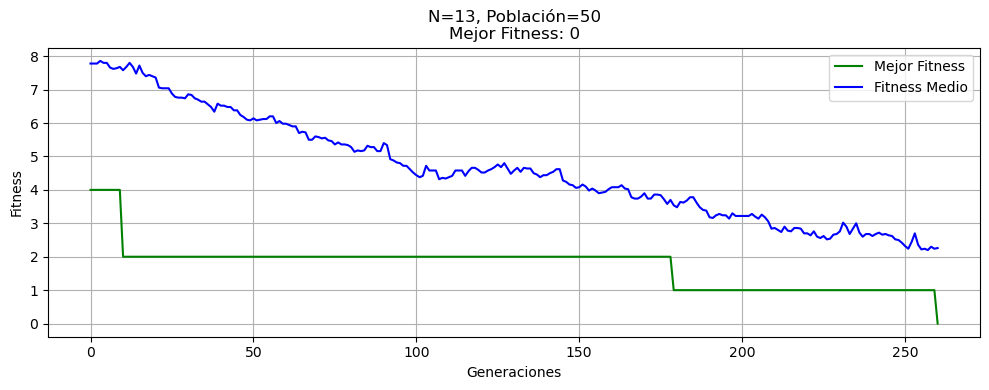

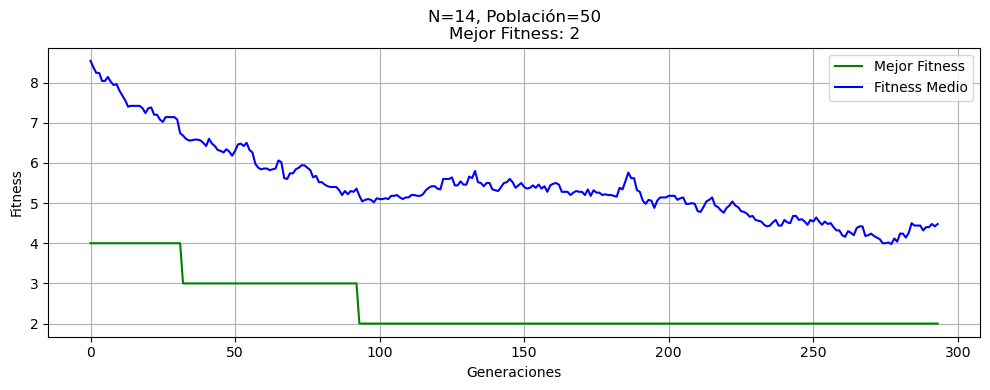

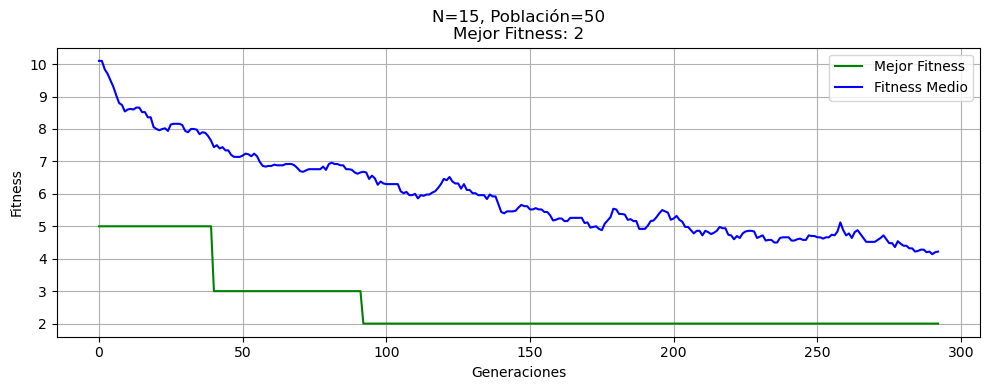

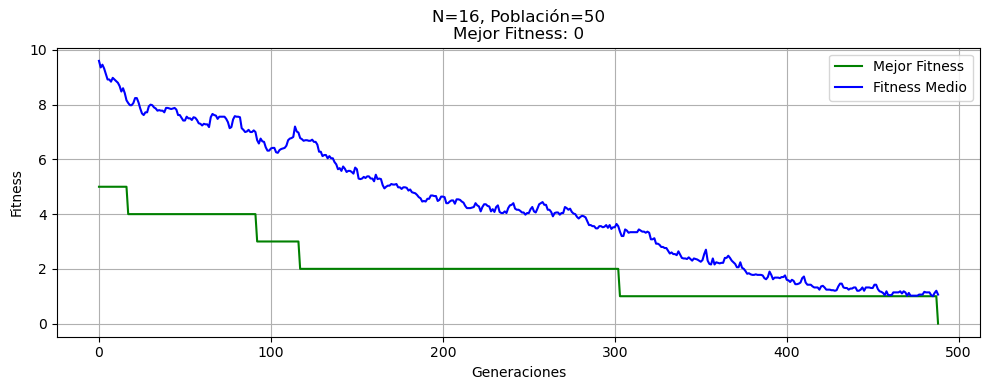

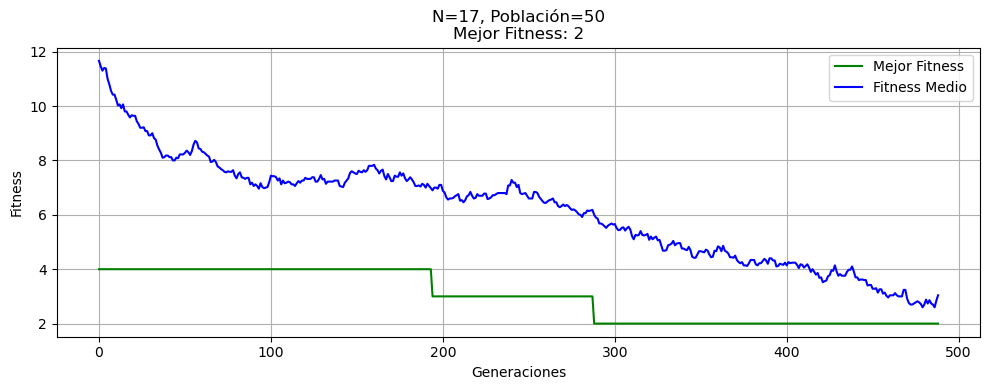

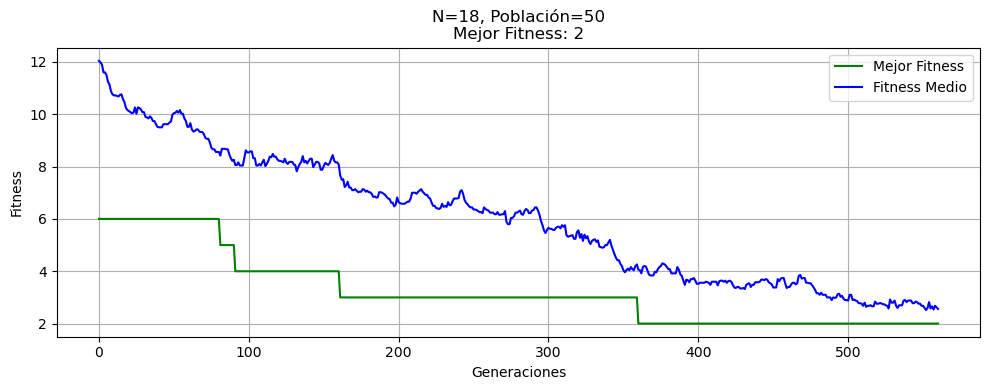

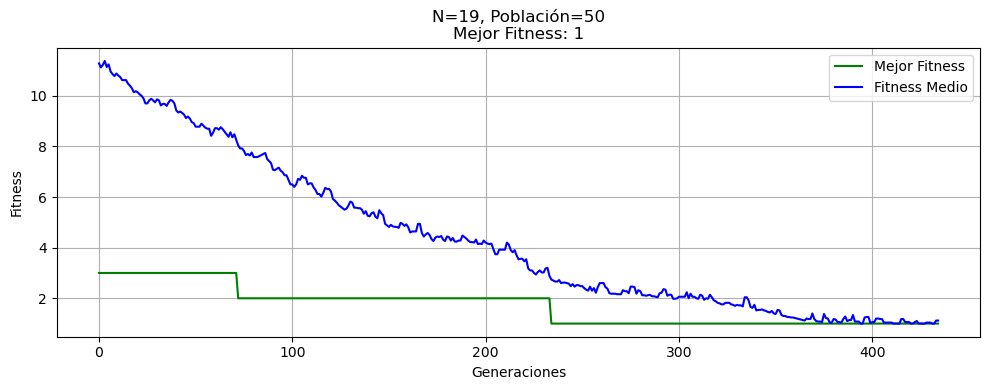

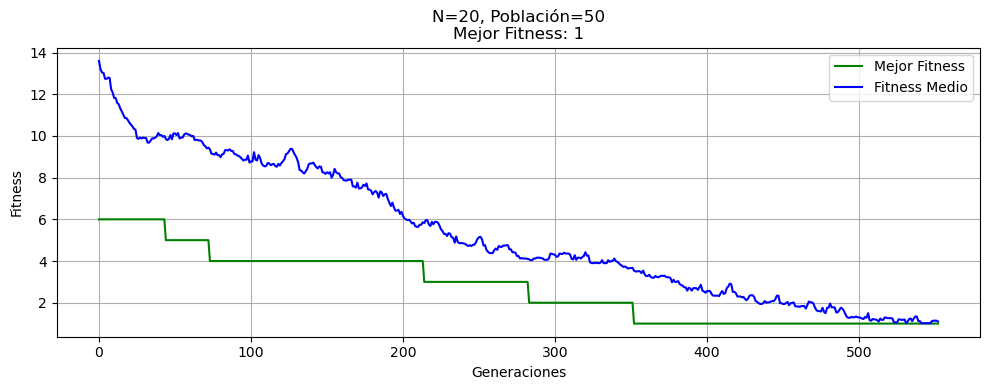

In [69]:
N_reinas_min = 6
N_reinas_max = 20
N_poblacion = 50
num_iteraciones = 500
num_ejecuciones = 3

for N_cromosoma in range(N_reinas_min, N_reinas_max + 1):
    # Ejecutamos el algoritmo
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    # Visualizamos los resultados
    fig, ax = plt.subplots(figsize=(10, 4))
    titulo = f"N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, titulo=titulo, ax=ax)
    plt.tight_layout()
    plt.show()  

A medida que aumenta el valor de N, el algoritmo genético encuentra más dificultades para hallar una solución óptima. En los casos en los que no se alcanza una solución válida, pueden influir varios factores:

- La población puede quedar atrapada en un mínimo local.
- El tamaño de la población puede ser insuficiente para una exploración efectiva del espacio de búsqueda.
- La diversidad genética puede ser baja, lo que limita la aparición de nuevas soluciones prometedoras.

Estos factores reducen la presión evolutiva del algoritmo, lo que puede provocar una convergencia prematura hacia soluciones subóptimas o, en el mejor de los casos, una convergencia demasiado lenta.


## 2. Mejora del algoritmo genético

Con el objetivo de mejorar el rendimiento del algoritmo genético, se llevarán a cabo una serie de pruebas experimentales. Todas las evaluaciones se realizarán utilizando el problema de las N-reinas con N = 20, lo que permite trabajar con una instancia suficientemente compleja para observar el comportamiento del algoritmo.

### 2.1. Impacto del tamaño de la población:

Para obtener una visión más completa, se considerarán distintos tamaños de población. Cada técnica o ajuste será probado con cada uno de estos tamaños para evaluar su impacto en la eficiencia y efectividad del algoritmo.

Los tamaños de población que se utilizarán son: 10, 30, 50, 100, 200, 300, 400, 600 y 800.

Como punto de partida, se ejecutará la versión actual del algoritmo con todos estos tamaños de población. Esto nos permitirá analizar su comportamiento inicial y establecer una base de comparación para las mejoras posteriores.

Definimos una lista con los parámetros fijos del problema:

In [ ]:
N_cromosoma = 20
N_poblaciones = [10, 30, 50, 100, 200, 300, 400, 600, 800]

A continuación, ejecutaremos esta primera prueba:

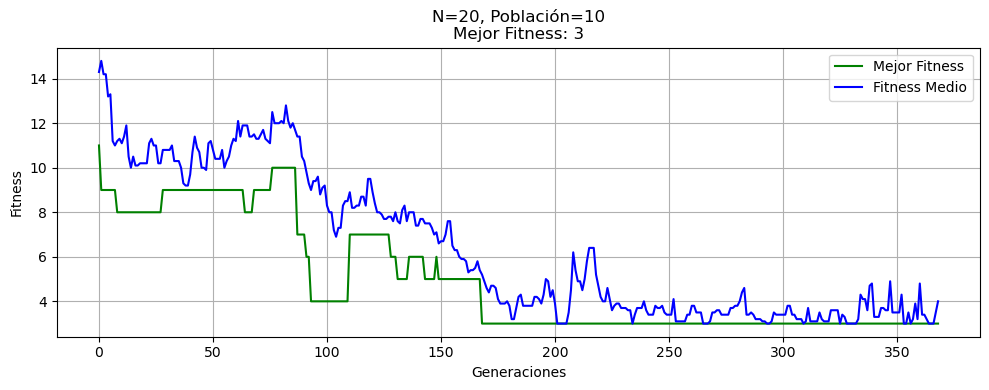

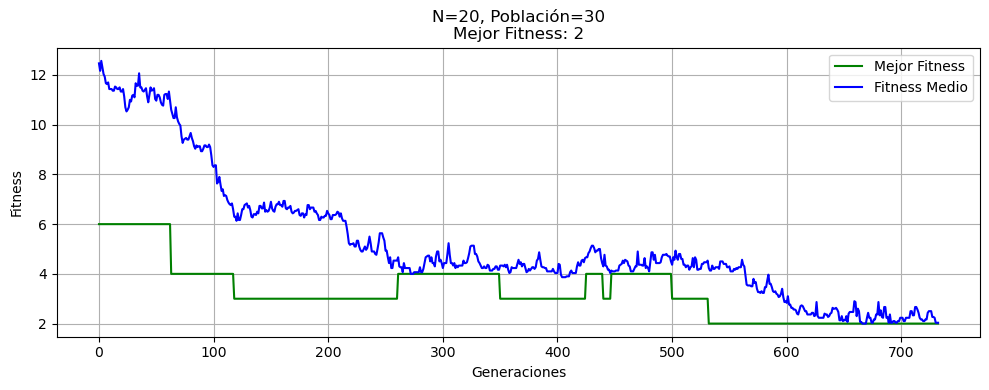

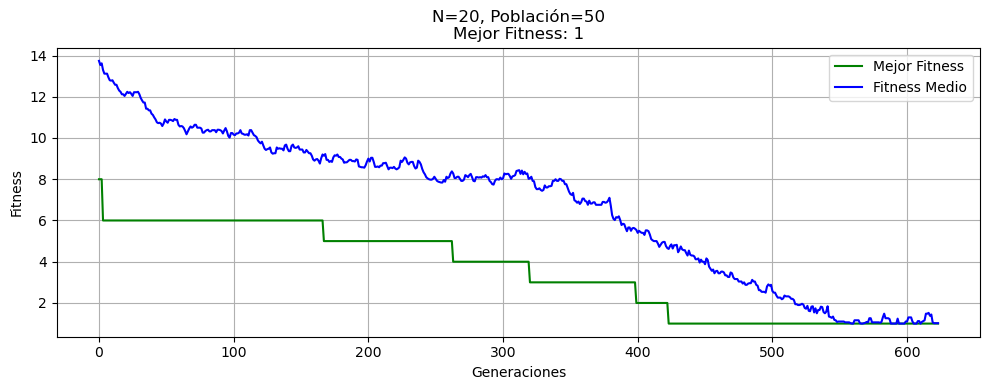

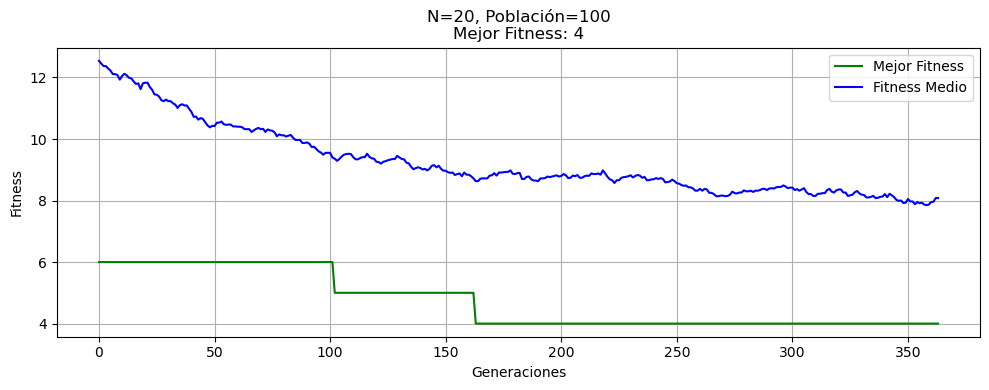

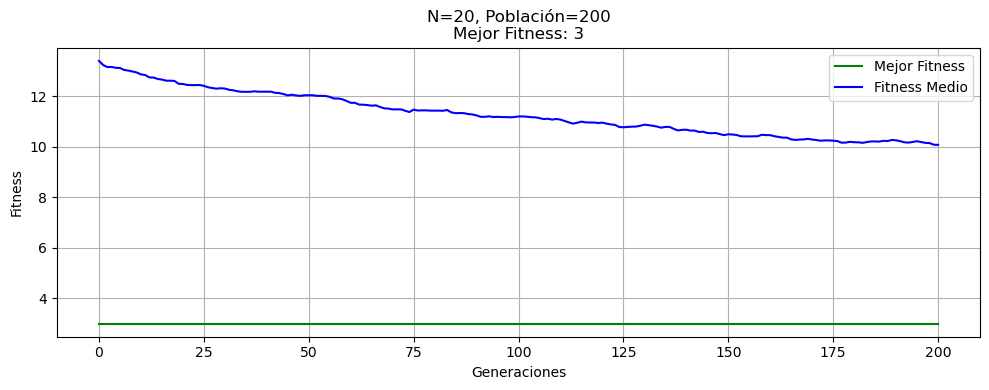

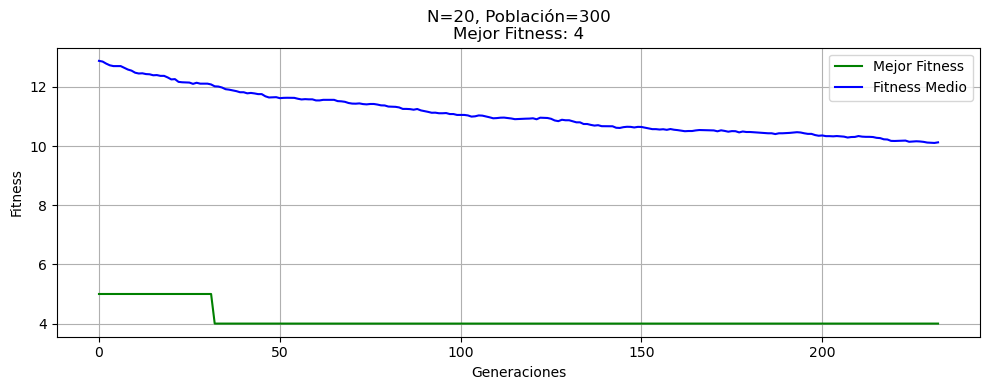

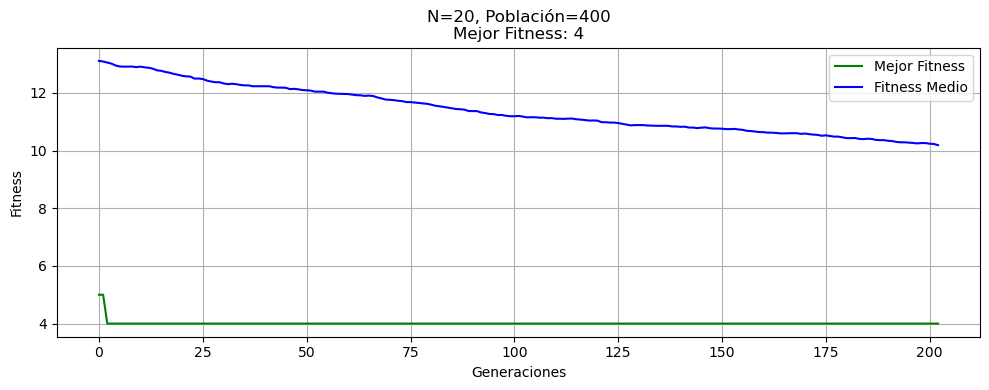

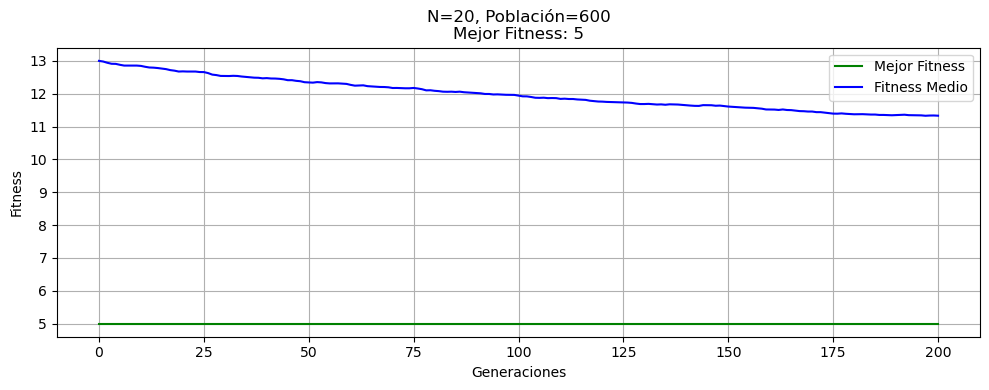

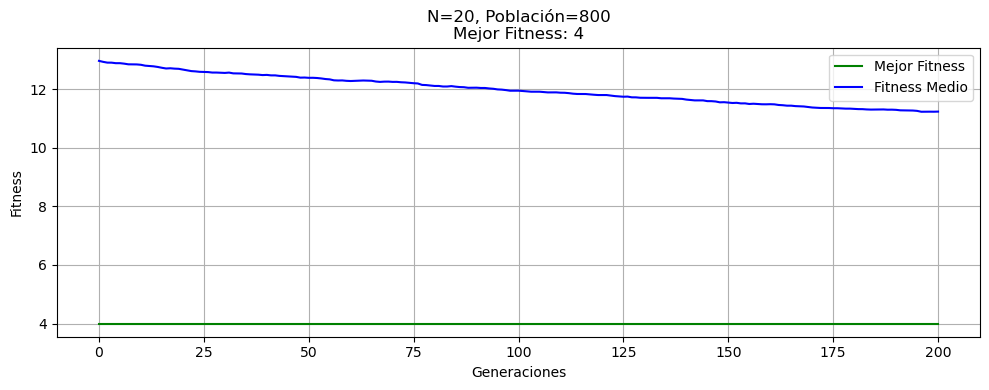

In [ ]:
for N_poblacion in N_poblaciones:
    # Ejecutamos el algoritmo
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)
        
    # Visualizamos los resultados
    fig, ax = plt.subplots(figsize=(10, 4))
    titulo = f"N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax, titulo=titulo)
    plt.tight_layout()
    plt.show()   

Se observa que, cuando el tamaño de la población es pequeño, el algoritmo tiende a converger hacia un óptimo local. Esto probablemente se deba a que, en poblaciones reducidas, resulta más fácil que un esquema dominante se imponga sobre el resto de la población.

Por otro lado, al aumentar el tamaño de la población, el algoritmo parece converger de forma más lenta. Esto podría deberse a una menor presión evolutiva. 

### 2.2. Impacto del número de iteraciones:

Para verificar esta hipótesis, repetiremos la prueba utilizando un número máximo de generaciones sin mejora igual a 1000.

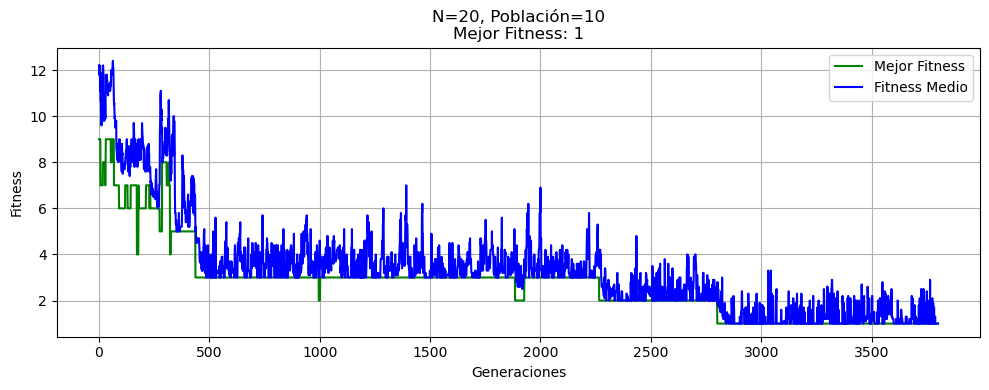

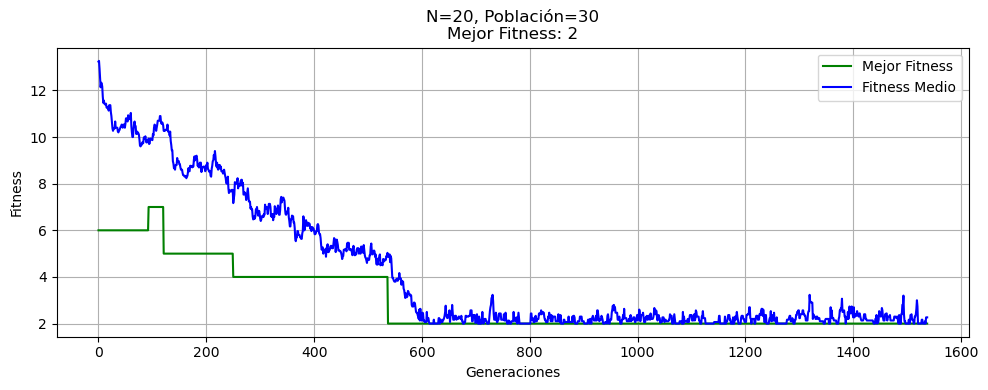

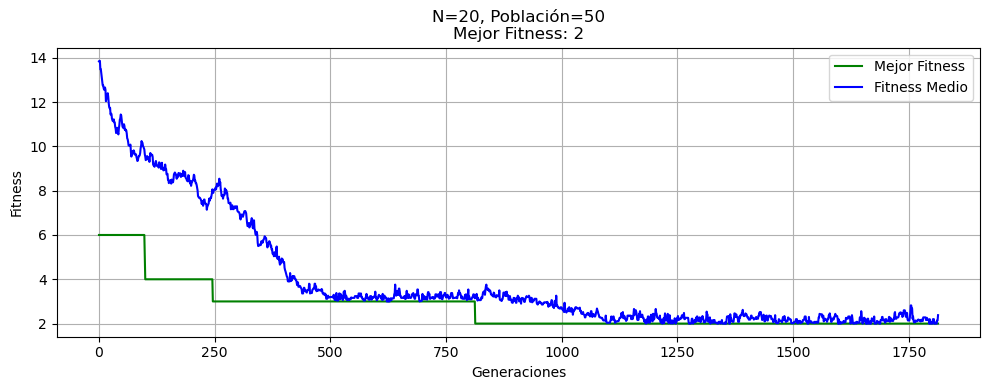

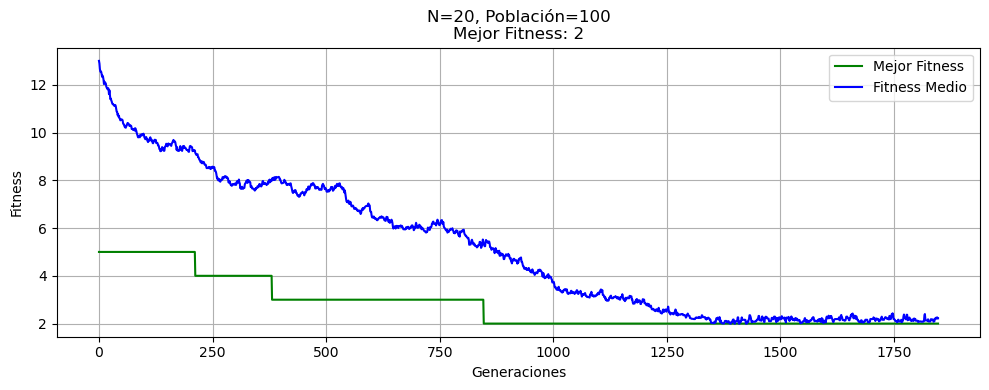

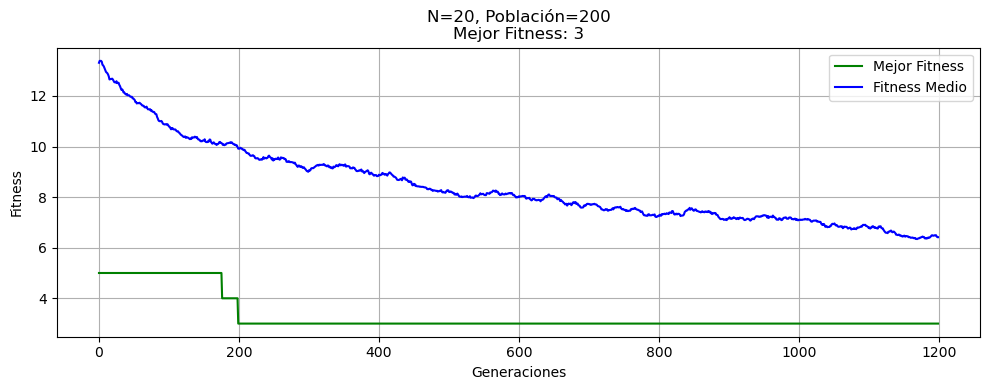

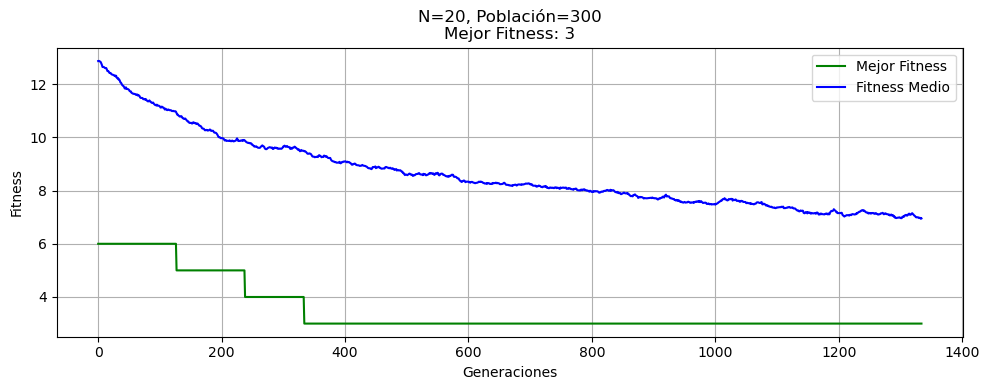

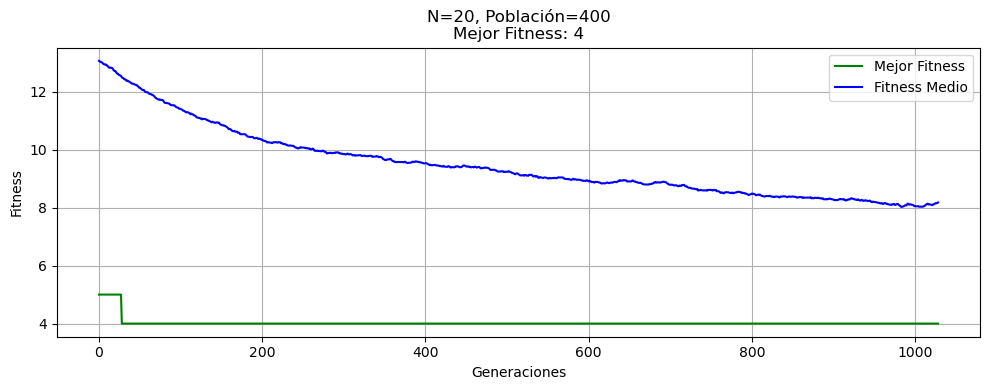

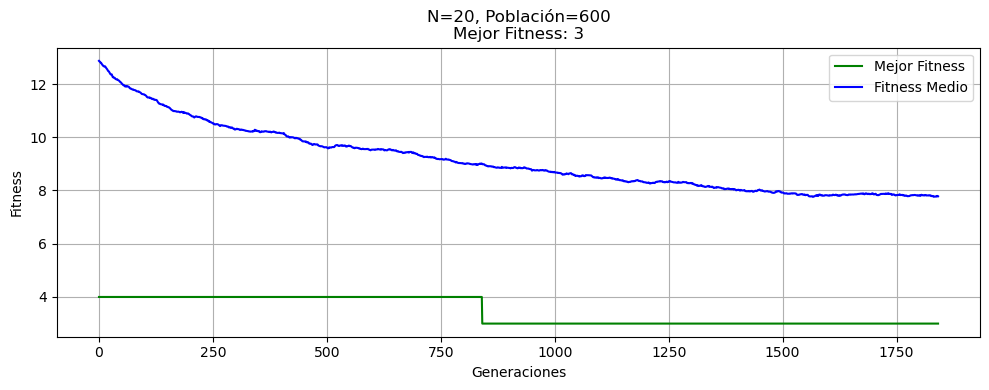

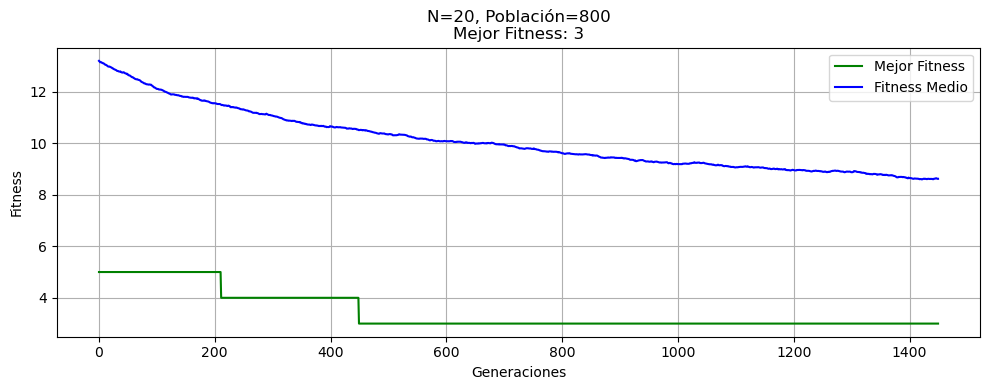

In [ ]:
for N_poblacion in N_poblaciones:
    # Ejecutamos el algoritmo
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=1000)
        
    # Visualizamos los resultados
    fig, ax = plt.subplots(figsize=(10, 4))
    titulo = f"N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax, titulo=titulo)
    plt.tight_layout()
    plt.show()   

En este caso, podemos concluir que **incrementar el número de iteraciones no es suficiente para garantizar que el algoritmo genético encuentre una solución**. La causa principal no es la falta de tiempo, sino las características de la población:

- **Con poblaciones pequeñas**, el problema principal es la **convergencia prematura**, donde la diversidad genética desaparece rápidamente y el algoritmo queda atrapado en óptimos locales.

- **Con poblaciones grandes**, aunque la diversidad inicial es mayor, la **presión evolutiva puede ser insuficiente**, lo que provoca que la mejora de los individuos sea muy lenta y el algoritmo tarde mucho en acercarse a una solución óptima.

Por tanto, en lugar de aumentar simplemente el número de generaciones, es más eficaz **ajustar el equilibrio entre diversidad genética y presión evolutiva**, por ejemplo:

- Incrementando el número de descendientes por generación.
- Usando métodos de selección más eficaces.
- Introduciendo mecanismos que fomenten o mantengan la diversidad poblacional.

Este enfoque puede mejorar significativamente el rendimiento del algoritmo sin necesidad de prolongar innecesariamente su ejecución.


### 2.3. Aumento de la presión evolutiva:

Con el objetivo de abordar el problema de la baja presión evolutiva, intentaremos generar una mayor cantidad de descendientes. Esto permitirá incrementar la diversidad dentro de la población y aumentará la probabilidad de que alguno de los individuos se acerque a una solución óptima. Para ello, se aplicará la siguiente estrategia:

- Se seleccionará al **40% de la población** como progenitores.  
- Los progenitores se emparejarán de **dos en dos**, y se aplicará **cruce en el 90%** de los casos.  
- El **30% de los descendientes** generados serán sometidos a **mutación**.

Primero crearemos un nuevo AG que implemente la técnica mencionada:

In [74]:
def AG_presion_alta(N_poblacion, N_cromosoma, f_fitness, f_sel_progenitores, f_sel_supervivientes, f_cruzamiento, f_mutacion, prob_progenitor, prob_cruz, prob_mut, max_sin_mejoras):
    # Creamos una población aleatoria
    poblacion = Poblacion(N_poblacion=N_poblacion,
                          N_cromosoma=N_cromosoma,
                          f_fitness=f_fitness)

    # Listas para almacenar el progreso del algoritmo
    mejor_fitness_generacion = []
    fitness_medio_generacion = []

    iteraciones = 0
    while(True):
        # Guardamos el estado de la iteración
        mejor_fitness_generacion.append(np.min(poblacion.fitness_poblacion))
        fitness_medio_generacion.append(poblacion.fitness_medio)

        # Si hemos alcanzado una solución, finalizamos
        if np.min(poblacion.fitness_poblacion) == 0:
            break

        # Si llevamos max_sin_mejoras generaciones sin mejoras, finalizamos
        if iteraciones >= max_sin_mejoras:
            if all(x == mejor_fitness_generacion[iteraciones] for x in mejor_fitness_generacion[iteraciones-max_sin_mejoras : iteraciones+max_sin_mejoras]):
                break

        descendientes = []

        # Seleccionamos los progenitores
        progenitores = f_sel_progenitores(poblacion=poblacion, N_progenitores=int(N_poblacion*prob_progenitor))
        for i in range(0, len(progenitores)-1):
            progenitor1, progenitor2 = progenitores[i], progenitores[i+1]

            if np.random.rand() <= prob_cruz:
                # Generamos el primer hijo
                hijo1 = f_cruzamiento(progenitor1=progenitor1, 
                                        progenitor2=progenitor2)
                
                # Mutamos el primer hijo
                if np.random.rand() <= prob_mut:
                    hijo1 = f_mutacion(hijo1)
                descendientes.append(hijo1)

                # Generamos el segundo hijo
                hijo2 = f_cruzamiento(progenitor1=progenitor2, 
                                        progenitor2=progenitor1)

                # Mutamos el segundo hijo
                if np.random.rand() <= prob_mut:
                    hijo2 = f_mutacion(hijo2)
                descendientes.append(hijo2)

        # Seleccionamos los supervivientes
        poblacion = f_sel_supervivientes(poblacion=poblacion, descendientes=descendientes)

        iteraciones += 1

    # Obtenemos los resultados
    fitness_poblacion = poblacion.fitness_poblacion
    best_idx = np.argmin(fitness_poblacion)
    mejor_solucion = poblacion.individuos[best_idx]
    mejor_fitness = fitness_poblacion[best_idx]

    return mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion

A continuación, compararemos el funcionamiento del algoritmo "base" con el algoritmo con "alta presión evolutiva":

Realizando pruebas para poblacion=10...
Realizando pruebas para poblacion=30...
Realizando pruebas para poblacion=50...
Realizando pruebas para poblacion=100...
Realizando pruebas para poblacion=200...
Realizando pruebas para poblacion=300...
Realizando pruebas para poblacion=400...
Realizando pruebas para poblacion=600...
Realizando pruebas para poblacion=800...


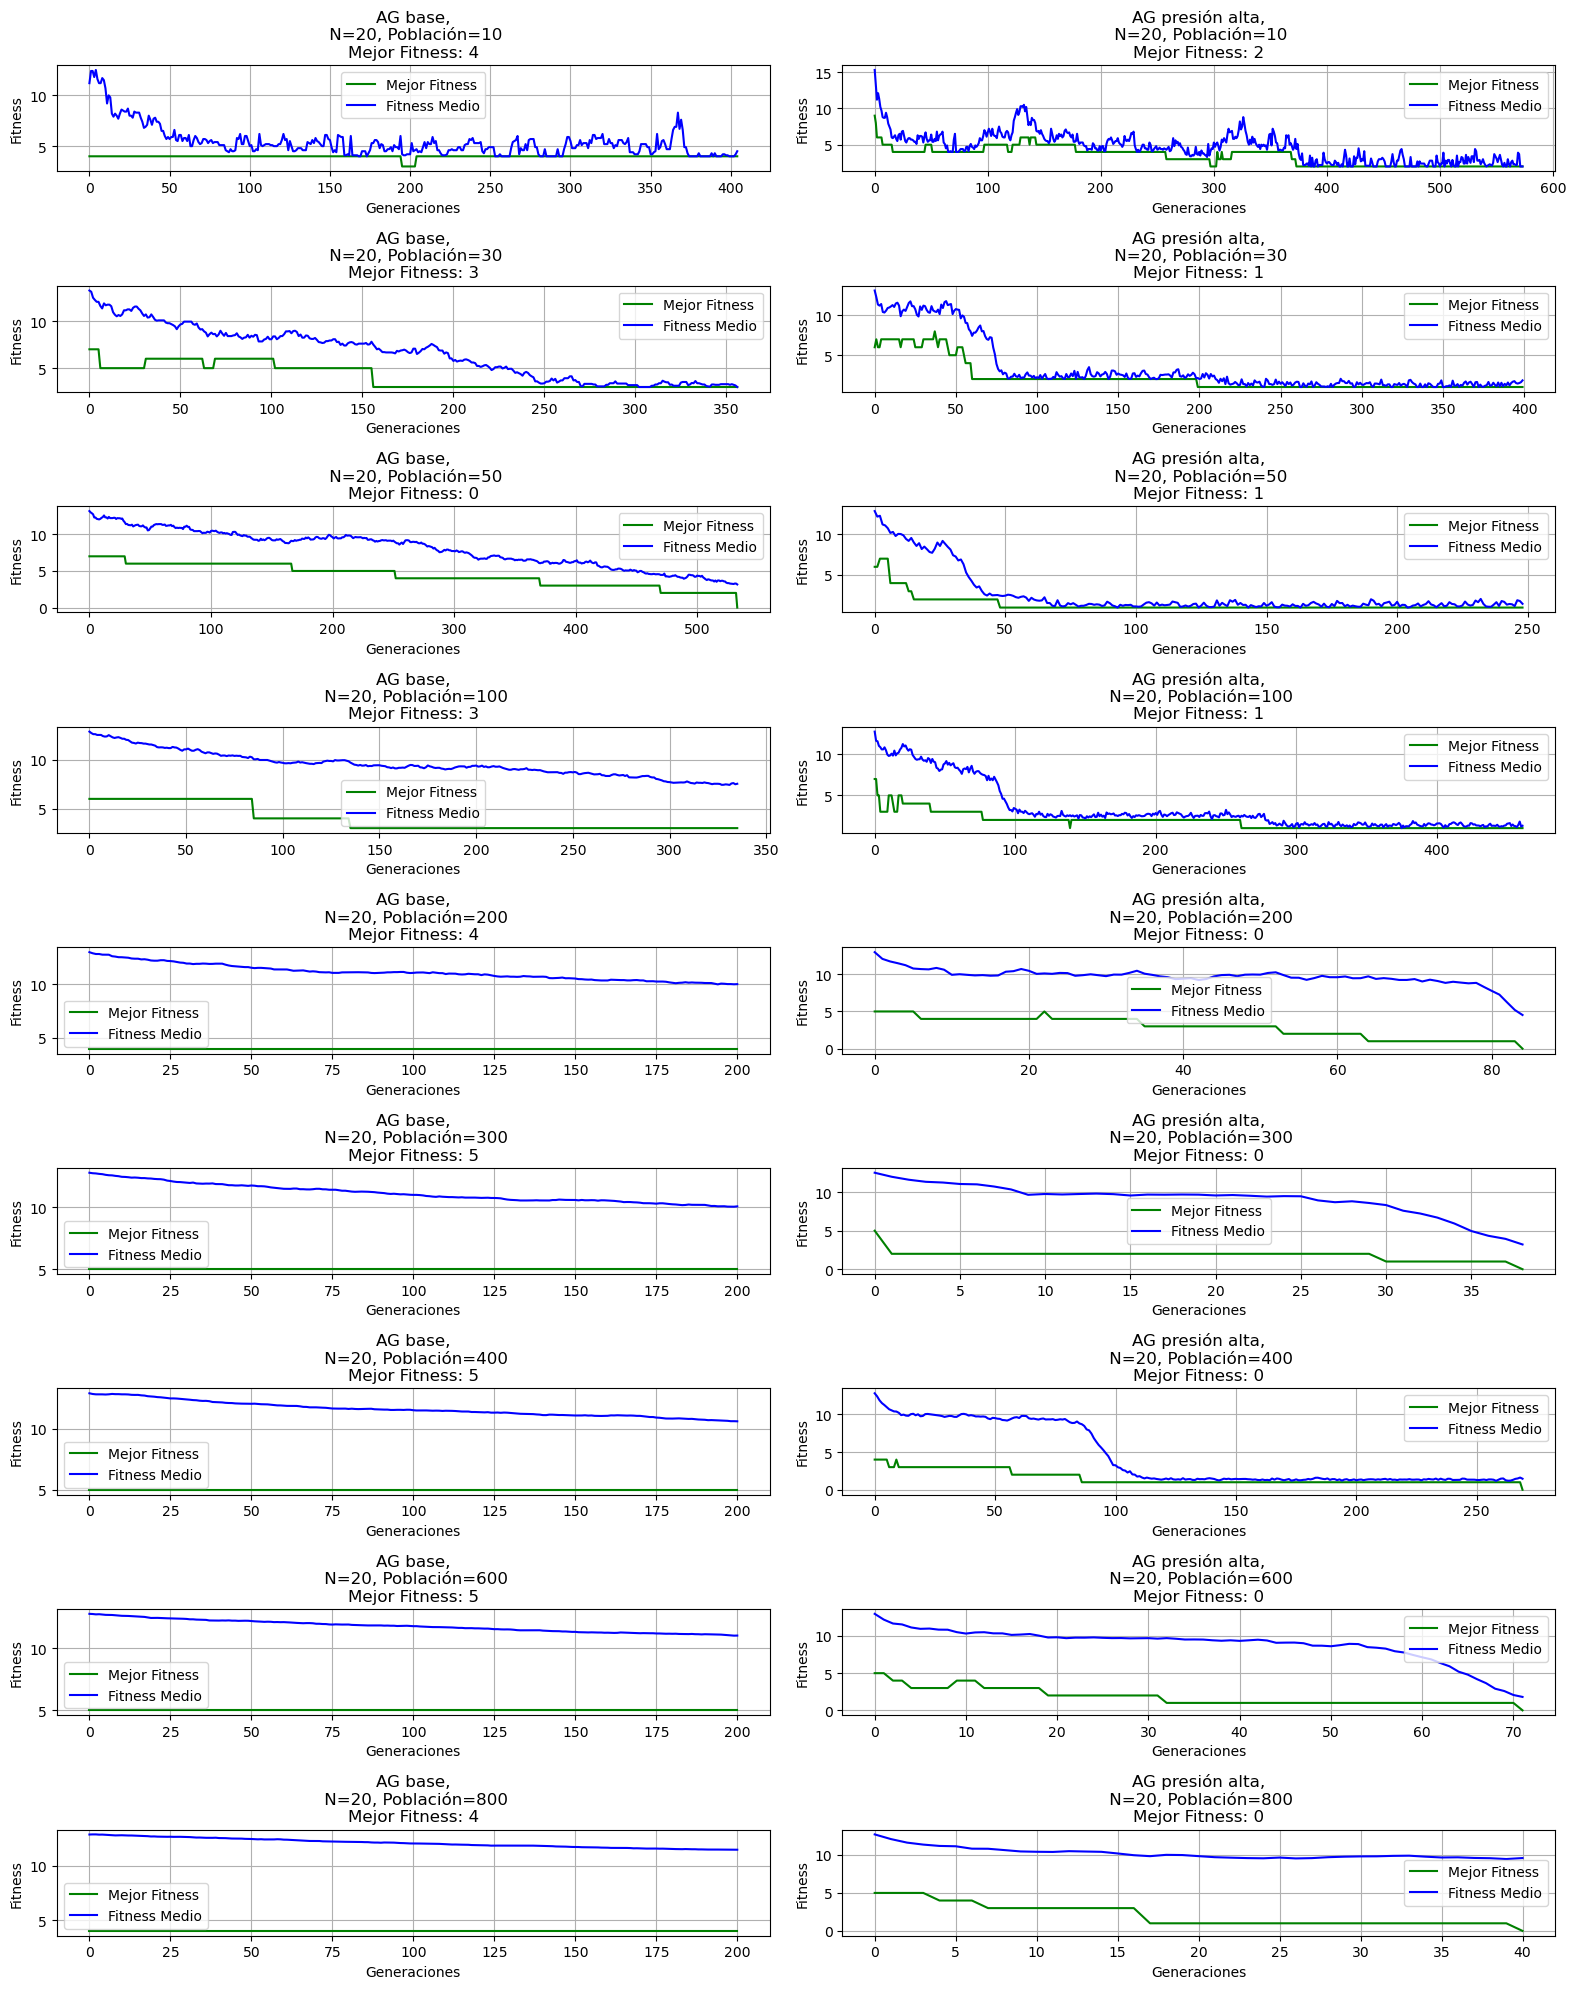

In [ ]:
fig, ax = plt.subplots(figsize=(16, 20), ncols=2, nrows=len(N_poblaciones))

column_titles = [
    "AG base",
    "AG presión alta"
]

for i, N_poblacion in enumerate(N_poblaciones):
    print(f"Realizando pruebas para poblacion={N_poblacion}...")
    # Ejecutamos el algoritmo base
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[0]},\n N={N_reinas}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 0], titulo=titulo)

    # Ejecutamos el algoritmo con presión alta
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[1]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 1], titulo=titulo)

plt.tight_layout()
plt.show() 

Al aumentar la cantidad de descendientes generados en cada generación, se incrementa la presión evolutiva, lo que permite al algoritmo genético encontrar soluciones al problema de las 20 reinas cuando la población es lo suficientemente grande. Este ajuste favorece una exploración más eficiente del espacio de búsqueda, mientras que una alta tasa de cruzamiento, combinada con una mutación equilibrada, contribuye a mantener una diversidad genética adecuada y a prevenir la convergencia prematura.

Los resultados muestran que en la mayoría de casos, el algoritmo consigue hallar una solución. No obstante, en algunos casos se observan aún muchas generaciones sin mejora del mejor individuo, lo que evidencia que la presión evolutiva podría seguir siendo insuficiente, lo que conlleva a una convergencia prematura. Hay que tener en cuenta que la aleatoriedad juega un papel clave en estos algoritmos, y que lo que en una ejecución ha quedado estancado, en otra podría encontrar la solución rápidamente. 

Además, el aumento en la cantidad de descendientes por generación conlleva un mayor coste computacional por iteración. Por ello, no resulta conveniente utilizar poblaciones excesivamente grandes ni prolongar innecesariamente el número de generaciones, ya que esto compromete la eficiencia del algoritmo.

En conclusión, este algoritmo con una mayor cantidad de descendientes permite alcanzar la solución más rápidamente. Por ello, continuaremos las pruebas con esta versión del AG.

### 2.4. Escalamiento Sigma de Goldberg:

Para tratar de solucionar el problema de la convergencia prematura, se aplicará el **escalamiento sigma de Goldberg** en el proceso de selección de progenitores y supervivientes. Esta técnica ajusta los valores de aptitud (fitness) para mantener una presión selectiva adecuada a lo largo de las generaciones, evitando que unos pocos individuos dominen la población demasiado pronto.

La fórmula del escalamiento sigma es la siguiente:

$$
f'_i = \max \left( f_i - (\bar{f} - c \cdot \sigma_f), \ 0 \right)
$$

donde:

- $f'_i$ es el fitness escalado del individuo $i$  
- $f_i$ es el fitness original del individuo $i$  
- $\bar{f}$ es el fitness promedio de la población  
- $\sigma_f$ es la desviación estándar del fitness en la población  
- $c$ es la constante de control (cogeremos $c = 2$)

Este método permite conservar la diversidad genética por más tiempo, al reducir la presión selectiva cuando las diferencias entre los individuos son pequeñas.

Primero crearemos una función que calcule el escalamiento sigma los individuos de una población:

In [78]:
def escalamiento_sigma(poblacion):
    fitness_poblacion = poblacion.fitness_poblacion

    # Calculamos los estadísticos necesarios
    mean = np.mean(fitness_poblacion)
    std = np.std(fitness_poblacion)

    # Calculamos el fitness escalado
    fitness_escalado = [np.max([f_i - (mean - 2*std), 0]) for f_i in fitness_poblacion]

    return fitness_escalado

Creamos una nueva función de selección de progenitores:

In [81]:
def seleccionar_progenitores_ruleta_sigma(poblacion, N_progenitores):
    # Calculamos las probabilidades basadas en el fitness invertido (fitness bajo = mejor)
    fitness_escalado = escalamiento_sigma(poblacion)
    fitness_invertido = 1 / (1 + np.array(fitness_escalado))

    # Seleccionamos los progenitores sin reemplazo
    progenitores_indices = np.random.choice(len(poblacion.individuos), size=N_progenitores, replace=False, p=fitness_invertido / np.sum(fitness_invertido))
    progenitores = [poblacion.individuos[i] for i in progenitores_indices]

    return progenitores

Creamos una nueva función de selección de supervivientes:

In [82]:
def seleccionar_supervivientes_ruleta_sigma(poblacion, descendientes):
    # Agregamos los descendientes a la población actual
    individuos = poblacion.individuos + descendientes
    f_fitness = individuos[0].f_fitness

    # Creamos la población sin eliminaciones
    poblacion_nueva = Poblacion(
        N_poblacion=poblacion.N_poblacion,
        N_cromosoma=poblacion.N_cromosoma,
        f_fitness=f_fitness,
        individuos=individuos
    )
    
    # Obtenemos los fitness de todos los individuos
    fitness_escalado = escalamiento_sigma(poblacion_nueva)
    
    # Calculamos las probabilidades basadas en el fitness invertido (fitness bajo = mejor)
    fitness_invertido = 1 / (1 + np.array(fitness_escalado))  # Sumamos 1 para evitar división por 0
    
    # Normalizamos las probabilidades
    probabilidades = fitness_invertido / np.sum(fitness_invertido)
    
    # Seleccionamos los supervivientes (mismo tamaño que la población original)
    supervivientes_indices = np.random.choice(len(individuos), size=poblacion.N_poblacion, replace=False, p=probabilidades)
    
    supervivientes = [individuos[i] for i in supervivientes_indices]
    
    # Creamos una nueva población con los mejores individuos seleccionados
    poblacion_superviviente = Poblacion(
        N_poblacion=poblacion.N_poblacion,
        N_cromosoma=poblacion.N_cromosoma,
        f_fitness=f_fitness,
        individuos=supervivientes
    )
    
    return poblacion_superviviente

A continuación, compararemos el funcionamiento del algoritmo con y sin el escalamiento:

Realizando pruebas para poblacion=10...
Realizando pruebas para poblacion=30...
Realizando pruebas para poblacion=50...
Realizando pruebas para poblacion=100...
Realizando pruebas para poblacion=200...
Realizando pruebas para poblacion=300...
Realizando pruebas para poblacion=400...
Realizando pruebas para poblacion=600...
Realizando pruebas para poblacion=800...


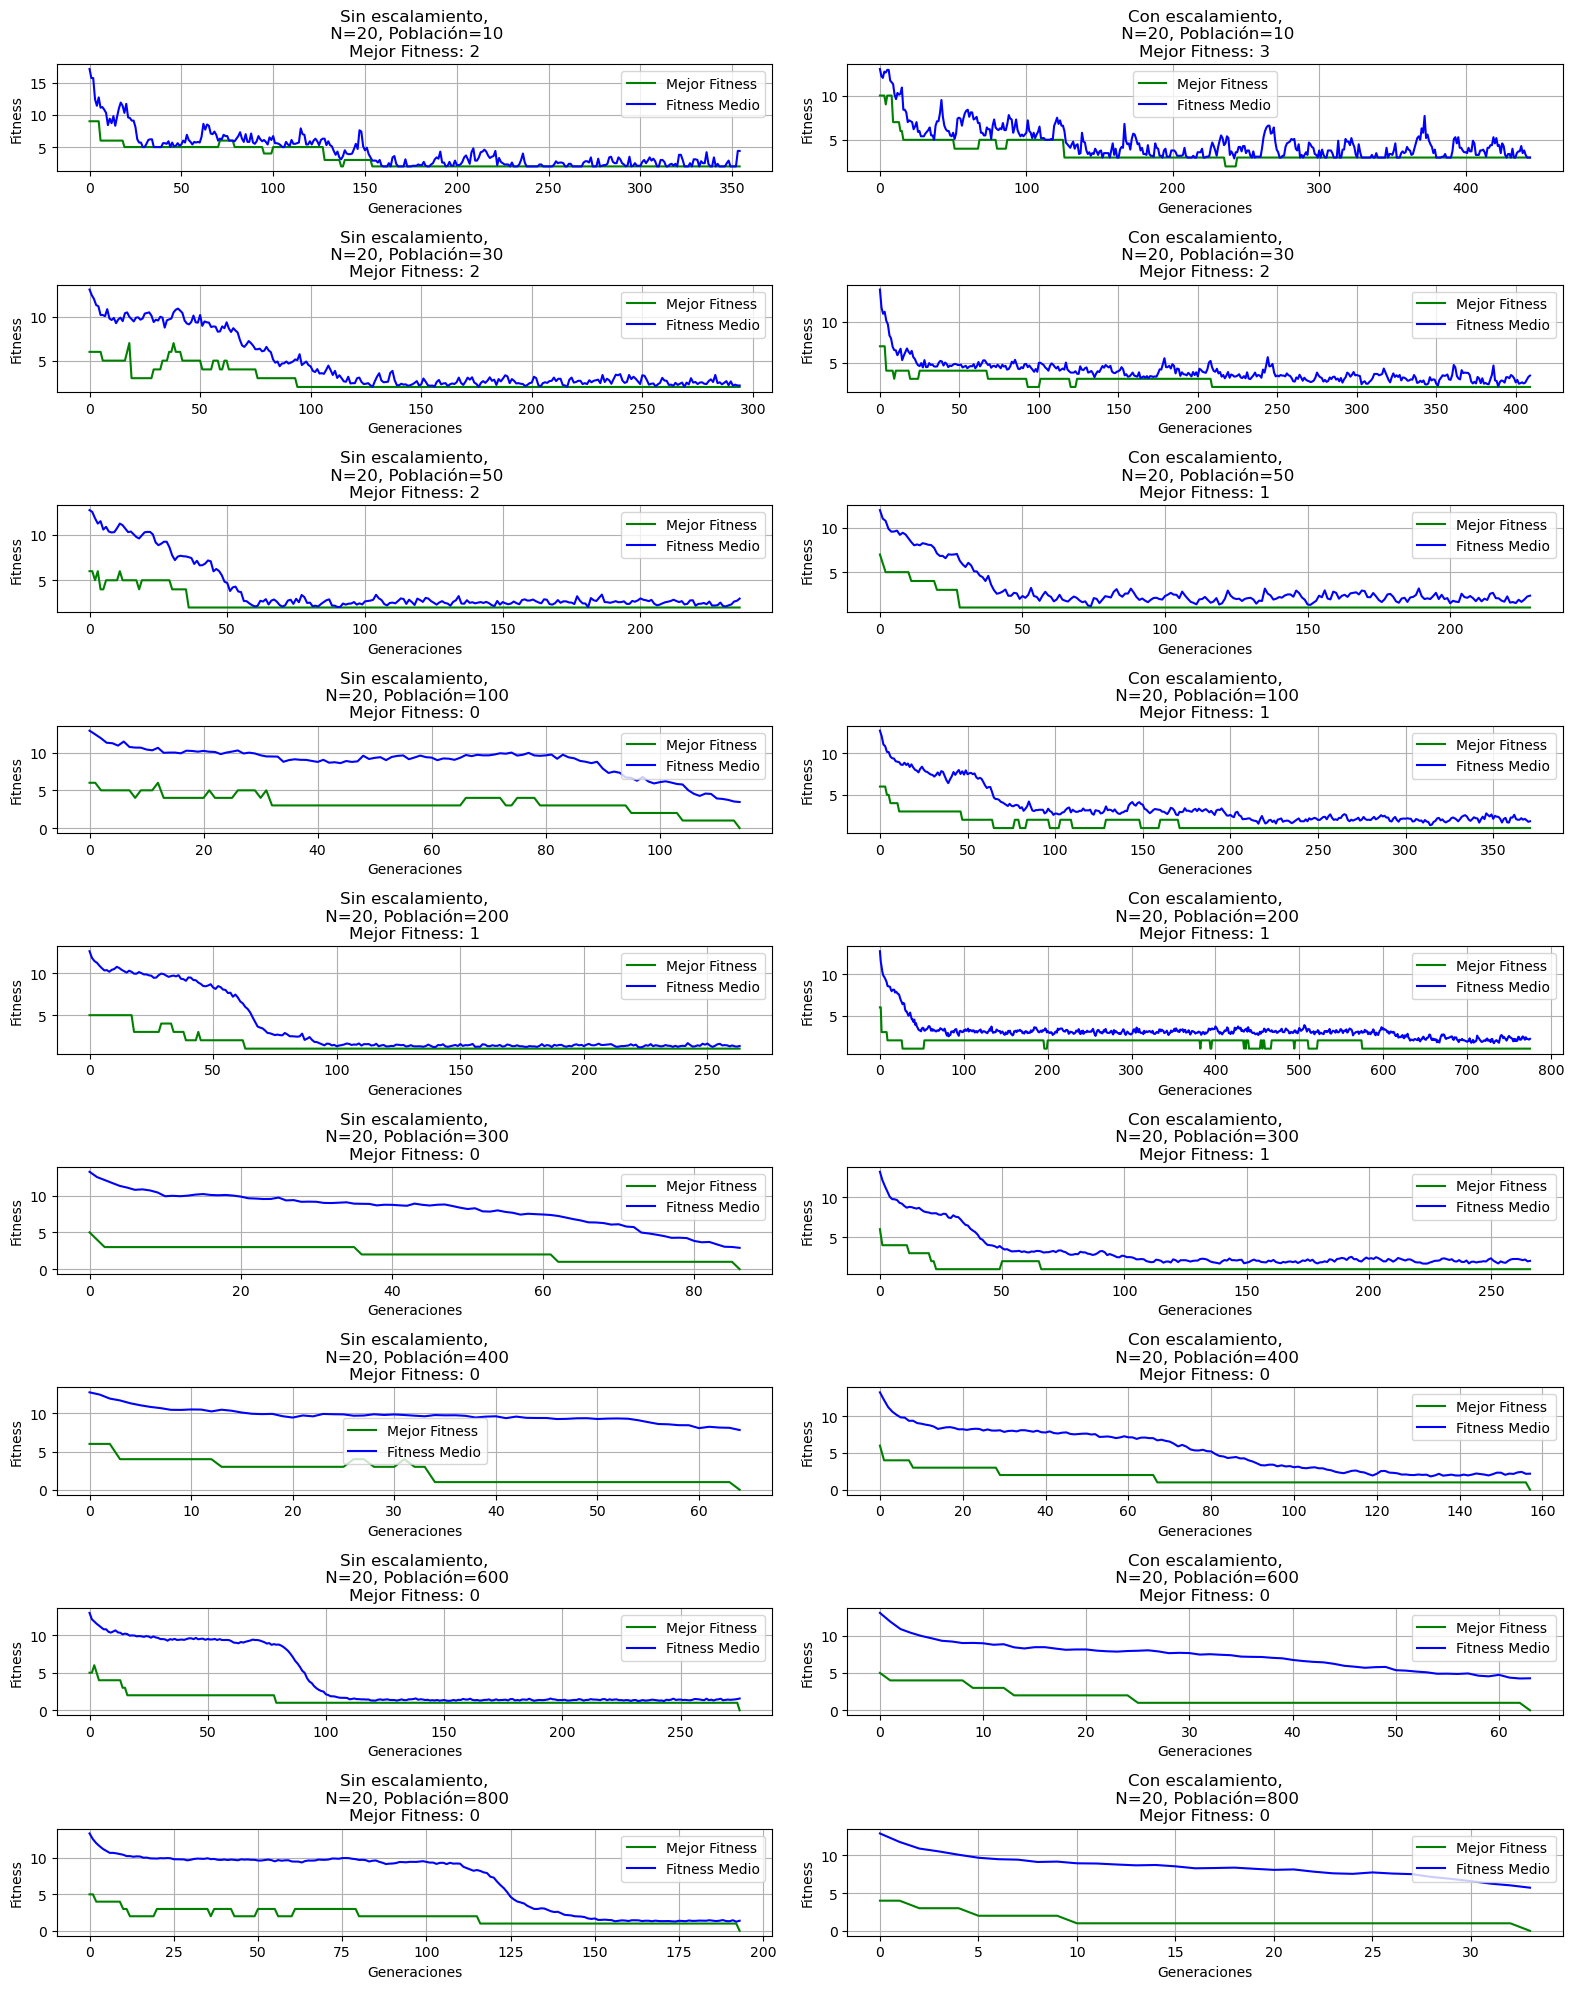

In [ ]:
fig, ax = plt.subplots(figsize=(16, 20), ncols=2, nrows=len(N_poblaciones))

column_titles = [
    "Sin escalamiento",
    "Con escalamiento"
]

for i, N_poblacion in enumerate(N_poblaciones):
    print(f"Realizando pruebas para poblacion={N_poblacion}...")
    # Ejecutamos el algoritmo sin escalamiento
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[0]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 0], titulo=titulo)

    # Ejecutamos el algoritmo con escalamiento
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta_sigma,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta_sigma,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[1]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 1], titulo=titulo)

plt.tight_layout()
plt.show() 

Como podemos observar, en general la separación entre la curva del mejor fitness y la del fitness medio es mayor al aplicar escalamiento sigma. Esto sugiere que el uso del escalamiento es beneficioso, ya que contribuye a mantener la diversidad genética durante más generaciones.

En particular, cuando el tamaño de la población es mayor, el efecto del escalamiento resulta más evidente: el algoritmo no solo retrasa la convergencia prematura, sino que también logra alcanzar soluciones óptimas en menos generaciones.

Por tanto, decidimos continuar utilizando el escalamiento sigma en las siguientes pruebas.

### 2.5. Impacto de la mutación:

La mutación desempeña un papel fundamental en los algoritmos genéticos. Cuando el algoritmo queda atrapado en un óptimo local, la mutación se convierte en un mecanismo esencial para introducir variación en los descendientes, permitiendo así escapar de esos mínimos y acercarse progresivamente a una solución óptima.

Para evaluar su impacto en el rendimiento del algoritmo, probaremos diferentes enfoques de mutación en los cromosomas. El objetivo es identificar qué método favorece una mejora más rápida del mejor fitness por generación y, en consecuencia, acelera la convergencia del algoritmo. Estos son las técnicas de mutación que utilizaremos:

- Mutación por sacudida (utilizada actualmente)
- Mutación por intercambio
- Mutación por inserción
- Mutación por inversión

Creamos la función encargada de mutar por intercambio:

In [ ]:
def mutar_individuo_intercambio(individuo):
    # Obtenemos el cromosoma
    cromosoma = individuo.cromosoma
    mutado = cromosoma.copy()
    N_cromosoma = len(cromosoma)

    # Seleccionmos dos índices aleatorios distintos
    i, j = sorted(random.sample(range(N_cromosoma), 2))

    # Intercambiamos las posiciones
    mutado[i], mutado[j] = mutado[j], mutado[i] 

    return Individuo(N_cromosoma=N_cromosoma, 
                     f_fitness=individuo.f_fitness, 
                     cromosoma=mutado)

Creamos la función encargada de mutar por inserción:

In [86]:
def mutar_individuo_insercion(individuo):
    # Obtenemos el cromosoma
    cromosoma = individuo.cromosoma
    mutado = cromosoma.copy()
    N_cromosoma = len(cromosoma)

    # Seleccionmos dos índices aleatorios distintos
    i, j = sorted(random.sample(range(N_cromosoma), 2))

    # Realizamos la inserción
    elemento = mutado.pop(j) 
    mutado.insert(i, elemento) 

    return Individuo(N_cromosoma=N_cromosoma, 
                     f_fitness=individuo.f_fitness, 
                     cromosoma=mutado)

Creamos la función encargada de mutar por inversión:

In [87]:
def mutar_individuo_inversion(individuo):
    # Obtenemos el cromosoma
    cromosoma = individuo.cromosoma
    mutado = cromosoma.copy()
    N_cromosoma = len(cromosoma)

    # Seleccionamos dos índices aleatorios distintos
    i, j = sorted(random.sample(range(N_cromosoma), 2))

    # Realizamos la inversión
    mutado[i:j+1] = reversed(mutado[i:j+1])

    return Individuo(N_cromosoma=N_cromosoma, 
                     f_fitness=individuo.f_fitness, 
                     cromosoma=mutado)

A continuación, compararemos el funcionamiento del algoritmo con los distintos tipos de mutación:

Realizando pruebas para poblacion=10...
Realizando pruebas para poblacion=30...
Realizando pruebas para poblacion=50...
Realizando pruebas para poblacion=100...
Realizando pruebas para poblacion=200...
Realizando pruebas para poblacion=300...
Realizando pruebas para poblacion=400...
Realizando pruebas para poblacion=600...
Realizando pruebas para poblacion=800...


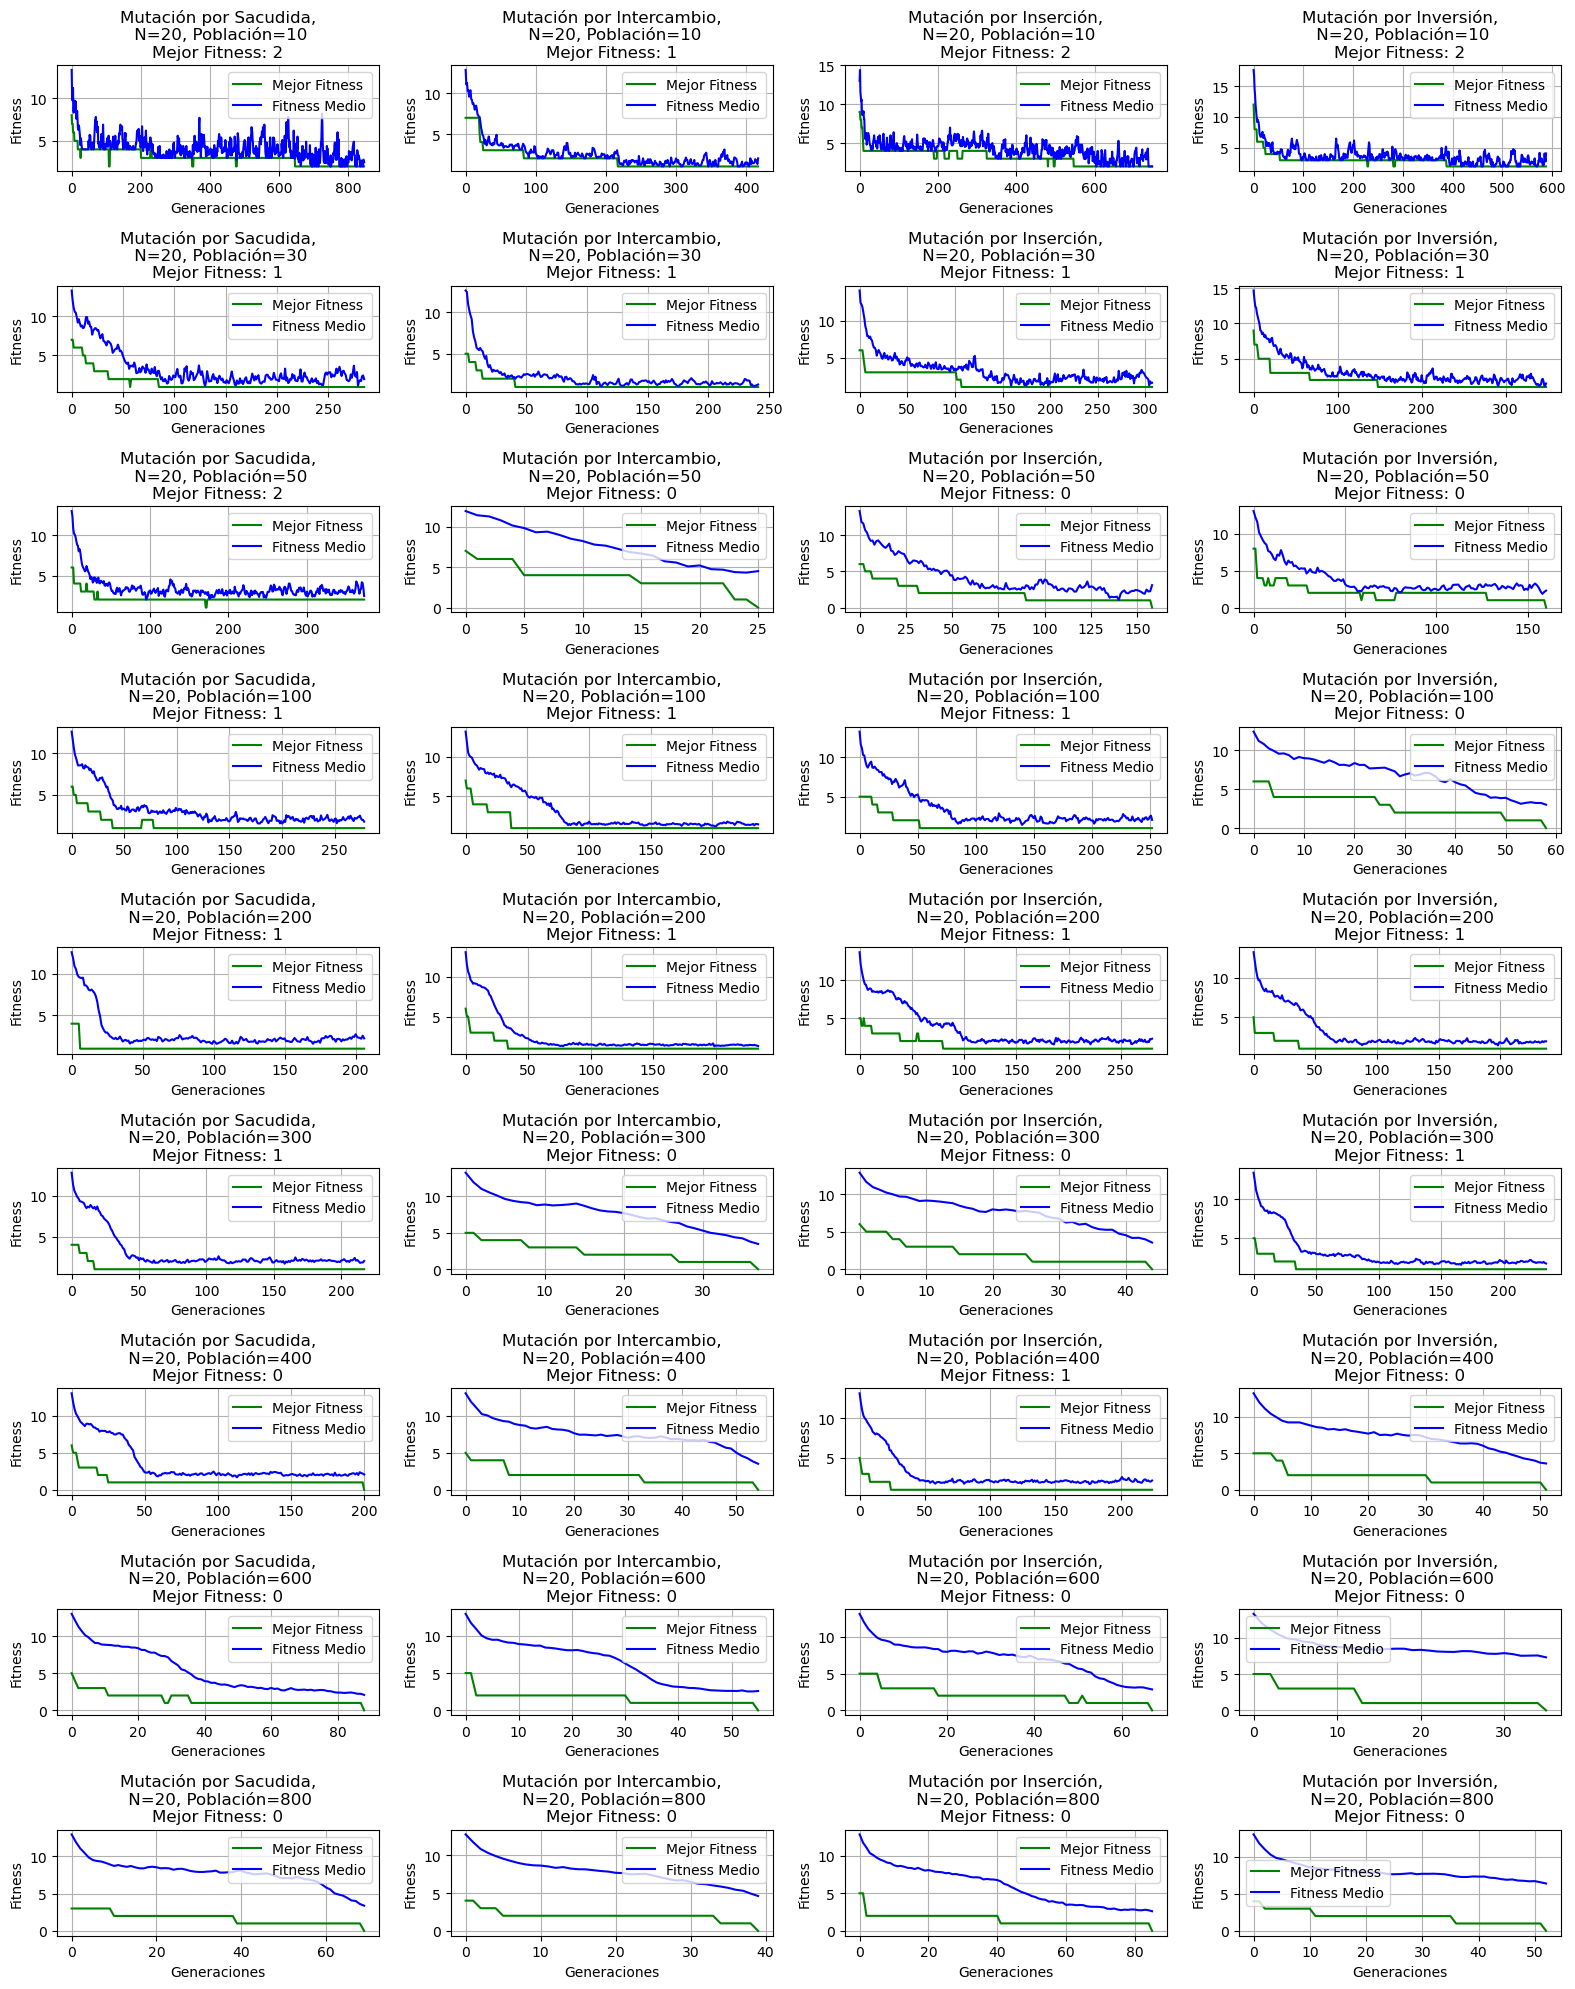

In [ ]:
fig, ax = plt.subplots(figsize=(16, 20), ncols=4, nrows=len(N_poblaciones))
column_titles = [
    "Mutación por Sacudida",
    "Mutación por Intercambio",
    "Mutación por Inserción",
    "Mutación por Inversión"
]

for i, N_poblacion in enumerate(N_poblaciones):

    print(f"Realizando pruebas para poblacion={N_poblacion}...")

    # Ejecutamos el algoritmo con mutación por sacudida
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta_sigma,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta_sigma,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_sacudida,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[0]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 0], titulo=titulo)

    # Ejecutamos el algoritmo con mutación por intercambio
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta_sigma,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta_sigma,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_intercambio,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[1]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 1], titulo=titulo)

    # Ejecutamos el algoritmo con mutación por inserción
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta_sigma,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta_sigma,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_insercion,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[2]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 2], titulo=titulo)

    # Ejecutamos el algoritmo con mutación por inversión
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta_sigma,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta_sigma,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_inversion,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[3]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 3], titulo=titulo)

plt.tight_layout()
plt.show() 

Tras realizar las pruebas, se observa con claridad que la mutación por intercambio es la más eficaz para resolver el problema de las N-reinas. En las gráficas podemos ver como la mutación por intercambio evita los estancamientos. Además, no solo logra encontrar soluciones válidas en la mayoría de los tamaños de población evaluados, sino que además lo hace requiriendo un menor número de generaciones en comparación con las demás estrategias de mutación.

Este resultado es coherente si consideramos la naturaleza estructural del problema. En una solución válida, cada reina debe ocupar una fila y una columna únicas. En este contexto, cuando el algoritmo se aproxima a una solución correcta, a menudo basta con intercambiar la posición de dos reinas para eliminar los conflictos restantes. La mutación por intercambio permite precisamente ese tipo de ajustes locales, de forma directa y eficiente.

En contraste, operadores como la inversión o la inserción tienden a modificar tramos más amplios del cromosoma, lo que puede desorganizar partes de la solución que ya eran correctas, dificultando así la convergencia final.

Esta diferencia pone de manifiesto la naturaleza estocástica y sensible de los algoritmos genéticos: pequeños cambios en el diseño de los operadores pueden tener un impacto significativo en su rendimiento, tanto en términos de velocidad como de capacidad de exploración del espacio de búsqueda.

En conclusión, la mutación por intercambio demuestra ser la mejor adaptada a las características del problema de las N-reinas, favoreciendo una búsqueda más eficiente y reduciendo la probabilidad de convergencia prematura. Por ello, continuaremos utilizando esta mutación.

### 2.6. Impacto del cruzamiento:

El cruzamiento es, al igual que mutación, uno de los procesos fundamentales en los algoritmos genéticos. Una elección adecuada del operador de cruzamiento puede no solo acelerar la convergencia hacia soluciones óptimas, sino también favorecer la diversidad genética dentro de la población, ayudando así al algoritmo a escapar de óptimos locales.

Con el objetivo de analizar su impacto, se evaluará el comportamiento del mejor fitness y del fitness medio. Estos se visualizarán para distintas estrategias de cruzamiento, permitiendo observar su influencia tanto en la velocidad de convergencia como en la estabilidad del proceso evolutivo.

Las técnicas de cruzamiento consideradas en este análisis son:

- Cruzamiento parcialmente mapeado (Partially Mapped Crossover, PMX; utilizado actualmente)
- Cruzamiento por orden (Order Crossover, OX)

Primero, crearemos la función encargada de realizar el cruzamiento por orden:

In [91]:
def cruzar_progenitores_ox(progenitor1, progenitor2):
    # Obtenemos los cromosomas
    p1 = progenitor1.cromosoma
    p2 = progenitor2.cromosoma
    N = len(p1)

    # Selección de dos puntos de corte
    punto1, punto2 = sorted(random.sample(range(N), 2))

    hijo = [None] * N

    # Copiar segmento de progenitor1 al hijo
    hijo[punto1:punto2] = p1[punto1:punto2]

    # Rellenar con genes de progenitor2, en orden, sin duplicar
    pos_hijo = punto2 % N
    pos_p2 = punto2 % N

    while None in hijo:
        gen = p2[pos_p2 % N]
        if gen not in hijo:
            hijo[pos_hijo % N] = gen
            pos_hijo += 1
        pos_p2 += 1

    return Individuo(N_cromosoma=N,
                     f_fitness=progenitor1.f_fitness,
                     cromosoma=hijo)

A continuación, compararemos el funcionamiento del algoritmo con los distintos tipos de cruzamiento:

Realizando pruebas para poblacion=10...
Realizando pruebas para poblacion=30...
Realizando pruebas para poblacion=50...
Realizando pruebas para poblacion=100...
Realizando pruebas para poblacion=200...
Realizando pruebas para poblacion=300...
Realizando pruebas para poblacion=400...
Realizando pruebas para poblacion=600...
Realizando pruebas para poblacion=800...


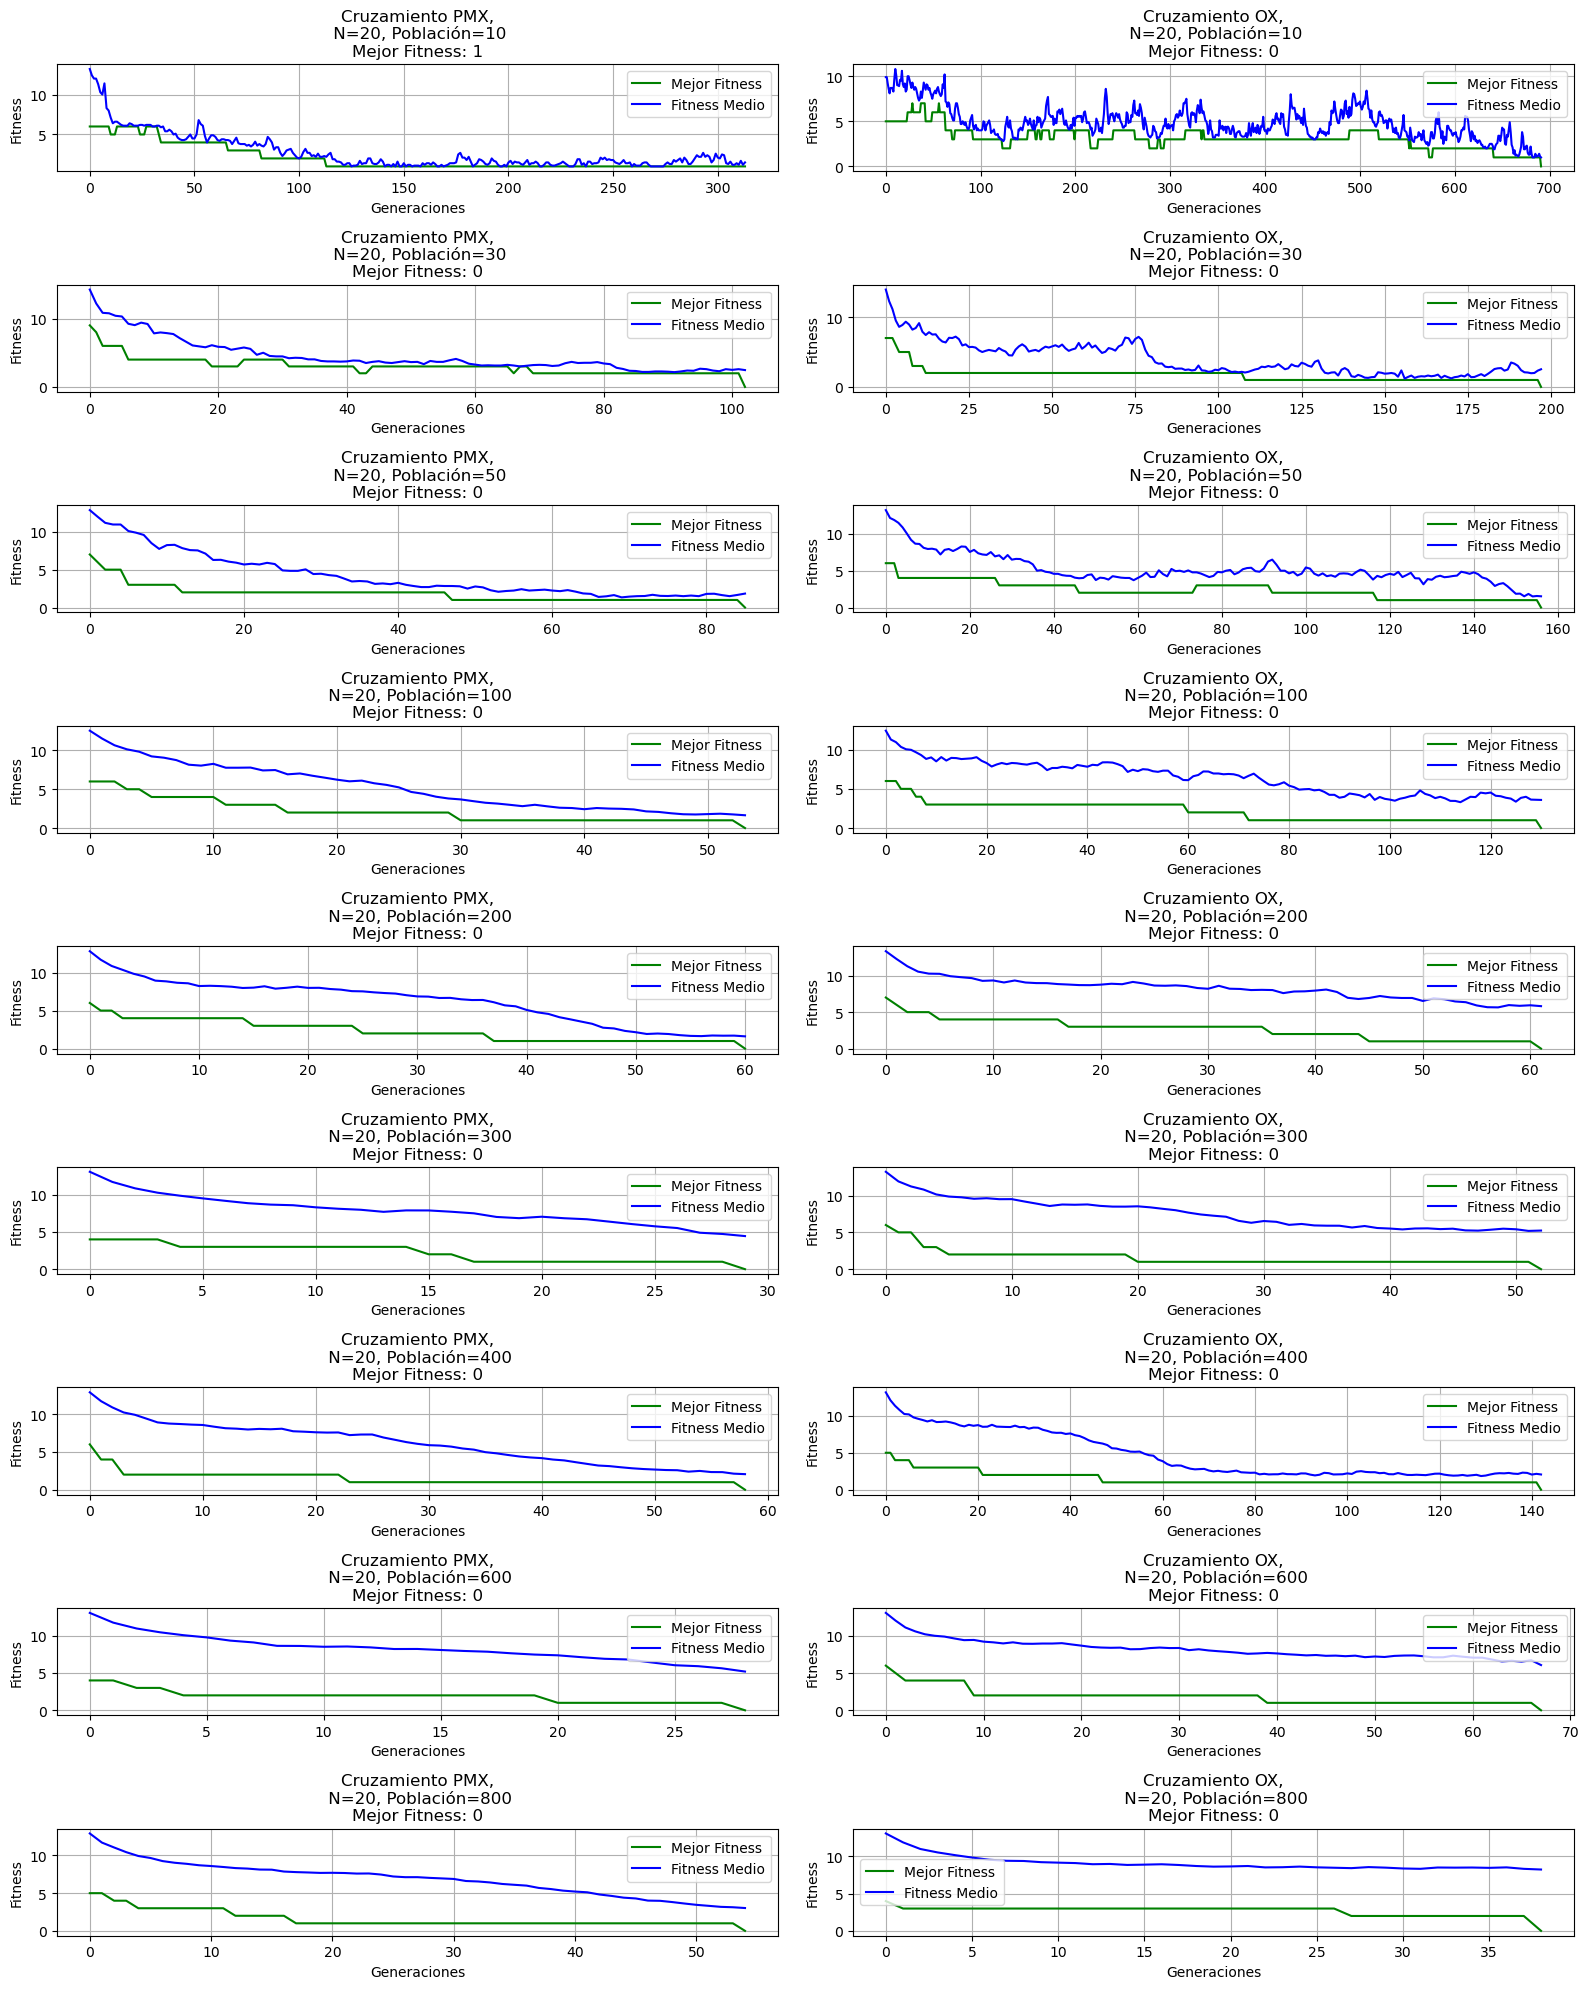

In [92]:
fig, ax = plt.subplots(figsize=(16, 20), ncols=2, nrows=len(N_poblaciones))

column_titles = [
    "Cruzamiento PMX",
    "Cruzamiento OX"
]

for i, N_poblacion in enumerate(N_poblaciones):
    print(f"Realizando pruebas para poblacion={N_poblacion}...")
    # Ejecutamos el algoritmo con PMX
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta_sigma,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta_sigma,
        f_cruzamiento=cruzar_progenitores_pmx,
        f_mutacion=mutar_individuo_intercambio,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[0]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 0], titulo=titulo)

    # Ejecutamos el algoritmo con OX
    mejor_solucion, mejor_fitness, mejor_fitness_generacion, fitness_medio_generacion = AG_presion_alta(
        N_poblacion=N_poblacion,
        N_cromosoma=N_cromosoma,
        f_fitness=fitness,
        f_sel_progenitores=seleccionar_progenitores_ruleta_sigma,
        f_sel_supervivientes=seleccionar_supervivientes_ruleta_sigma,
        f_cruzamiento=cruzar_progenitores_ox,
        f_mutacion=mutar_individuo_intercambio,
        prob_progenitor=0.4,
        prob_cruz=0.9,
        prob_mut=0.3,
        max_sin_mejoras=200)

    titulo = f"{column_titles[1]},\n N={N_cromosoma}, Población={N_poblacion}\nMejor Fitness: {mejor_fitness}"
    crear_grafico_fitness(mejor_fitness_generacion, fitness_medio_generacion, ax=ax[i, 1], titulo=titulo)

plt.tight_layout()
plt.show() 

En general, esta prueba sugiere que no existen diferencias significativas entre los operadores de cruzamiento OX y PMX en cuanto al rendimiento del algoritmo genético. Sin embargo, se observa que, al utilizar OX, la distancia entre las curvas del mejor fitness y del fitness medio tiende a ser ligeramente mayor, lo que podría indicar una mejor preservación de la diversidad genética.

Por esta razón, optaremos por continuar utilizando el operador OX en las siguientes pruebas.

No obstante, es importante recordar que los algoritmos genéticos son métodos estocásticos. En ejecuciones diferentes, PMX podría superar a OX, lo que explicaría el comportamiento similar observado entre ambos operadores en esta evaluación.

### 2.7. Impacto del elitismo:

El elitismo es una técnica común en algoritmos genéticos que consiste en conservar una parte de los mejores individuos de la población actual sin alterarlos, garantizando así que las soluciones de mayor calidad no se pierdan en las siguientes generaciones. Esta estrategia puede acelerar la convergencia hacia soluciones óptimas al preservar los avances logrados, pero también puede reducir la diversidad genética, lo que incrementa el riesgo de caer en óptimos locales.

En esta sección, se analiza el posible impacto del elitismo en el comportamiento del algoritmo, comparándolo con la versión actual que no lo utiliza. Esto permitirá evaluar si incorporar elitismo podría mejorar el rendimiento o si, por el contrario, resulta más beneficioso mantener una población completamente dinámica y abierta a la variación en cada generación.

Para realizar las correspondientes pruebas, crearemos una función para seleccionar supervivientes que lo incorpore:


In [ ]:
# Completar

### 2.8. Reseteo de la población:

En muchos casos, la simple generación de nuevos descendientes no es suficiente para escapar de óptimos locales. Cuando esto ocurre, el algoritmo puede estancarse y dejar de mejorar, incluso durante muchas generaciones.

Como posible solución, implementaremos una variante del algoritmo genético que incorpora un **mecanismo de reseteo parcial de la población**. La idea es que, cuando se alcance un número máximo de generaciones sin mejora, se reemplace aleatoriamente al **50% de los individuos** de la población por nuevos individuos generados aleatoriamente.

Para evitar un ciclo infinito de reseteos, se limitará este mecanismo a un **máximo de dos reseteos** durante toda la ejecución del algoritmo.

In [ ]:
# Completar

## 3. Rendimiento del algoritmo creado:

In [ ]:
# Completar

## 4. Máximo N-reinas resuelto:

In [ ]:
# Completar